<a href="https://colab.research.google.com/github/BragaGiu/projeto-amazon-sales/blob/main/DataLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conectar/importar dados para outras ferramentas

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
product_df = pd.read_csv ('/content/amazon_product.csv')
review_df = pd.read_csv ('/content/amazon_review.csv')

In [ ]:
# Exibindo as primeiras 5 linhas do dataset
display(review_df.head())
display(product_df.head())

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269"
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4,"43,994"
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,B096MSW6CT,3.9,"7,928"
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B08HDJ86NZ,4.2,"94,363"
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,B08CF3B7N1,4.2,"16,905"


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [ ]:
# Mostrar número de linhas e colunas de cada tabela
print("Número de linhas e colunas na tabela product:")
display(product_df.shape)

print("\nNúmero de linhas e colunas na tabela review:")
display(review_df.shape)

# Identificar e Tratar Valores Nulos

In [ ]:
# Função genérica de limpeza de colunas numéricas com símbolos
def limpa_coluna_numerica(serie, moeda=False, percentual=False):
    serie = serie.astype(str).str.strip()

    if moeda:
        serie = serie.str.replace('₹', '', regex=False)

    if percentual:
        serie = serie.str.replace('%', '', regex=False)

    serie = serie.str.replace(',', '', regex=False)

    # Substitui 'nan' string por string vazia
    serie = serie.replace('nan', '')

    # Converte para numérico (float), erros viram NaN
    serie = pd.to_numeric(serie, errors='coerce')

    return serie

# Agora aplicamos em cada coluna:

# Para o dataframe product:
product_df['discounted_price'] = limpa_coluna_numerica(product_df['discounted_price'], moeda=True)
product_df['actual_price'] = limpa_coluna_numerica(product_df['actual_price'], moeda=True)
product_df['discount_percentage'] = limpa_coluna_numerica(product_df['discount_percentage'], percentual=True)

# Para o dataframe review:
review_df['rating_count'] = limpa_coluna_numerica(review_df['rating_count'])
review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')

In [ ]:
# Exibindo valores nulos nas tabelas:
print("Valores nulos em review_df:")
display(review_df.isnull().sum())

print("\nValores nulos em product_df:")
display(product_df.isnull().sum())

Valores nulos em review_df:


,0
user_id,0
user_name,0
review_id,0
review_title,0
review_content,0
img_link,466
product_link,466
product_id,0
rating,1
rating_count,2



Valores nulos em product_df:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
about_product,4


In [ ]:
# Excluir linhas onde 'about_product' é nulo no DataFrame product
product_df.dropna(subset=['about_product'], inplace=True)

print("Número de linhas em product_df após remover nulos em 'about_product':", len(product_df))

print("\nValores nulos restantes em product_df:")
display(product_df.isnull().sum())

Número de linhas em product_df após remover nulos em 'about_product': 1465

Valores nulos restantes em product_df:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
about_product,0


In [ ]:
# Excluir linhas onde 'rating_count' é nulo no DataFrame review
review_df.dropna(subset=['rating_count'], inplace=True)
print("Número de linhas em review_df após remover nulos em 'rating_count':", len(review_df))

print("\nValores nulos restantes em review_df:")
display(review_df.isnull().sum())

Número de linhas em review_df após remover nulos em 'rating_count': 1463

Valores nulos restantes em review_df:


,0
user_id,0
user_name,0
review_id,0
review_title,0
review_content,0
img_link,466
product_link,466
product_id,0
rating,1
rating_count,0


In [ ]:
# Listando número de linhas após a exclusão dos nulos
print("Número de linhas na tabela product após a exclusão de nulos:")
display(product_df.shape[0])

print("\nNúmero de linhas na tabela review após a exclusão de nulos:")
display(review_df.shape[0])

Número de linhas na tabela product após a exclusão de nulos:


1465


Número de linhas na tabela review após a exclusão de nulos:


1463

#Identificar e Tratar Valores Duplicados

In [ ]:
# Remover Duplicatas nos Dados com base na coluna 'product_id' do dataframe product
review_df.drop_duplicates(subset=['user_id', 'review_id', 'product_id'], inplace=True)
product_df.drop_duplicates(subset=['product_id'], inplace=True)

print("Número de linhas em review_df após remover duplicatas:", len(review_df))
print("Número de linhas em product_df após remover duplicatas:", len(product_df))

Número de linhas em review_df após remover duplicatas: 1359
Número de linhas em product_df após remover duplicatas: 1351


In [ ]:
# Exibir quantos registros duplicados foram eliminados do conjunto original.
original_review_df = pd.read_csv('/content/amazon_review.csv')
original_product_df = pd.read_csv('/content/amazon_product.csv')

removed_review_duplicates_count = len(original_review_df) - len(review_df)
removed_product_duplicates_count = len(original_product_df) - len(product_df)

print(f"Número de duplicatas removidas em review_df: {removed_review_duplicates_count}")
print(f"Número de duplicatas removidas em product_df: {removed_product_duplicates_count}")

Número de duplicatas removidas em review_df: 106
Número de duplicatas removidas em product_df: 118


In [ ]:
# Verificar duplicatas no DataFrame 'product' com base em 'product_id'
duplicatas_product_id = product_df.duplicated(subset=['product_id']).sum()
print(f"Número de duplicatas na coluna 'product_id' do DataFrame 'product': {duplicatas_product_id}")

# Verificar duplicatas no DataFrame 'review' com base em 'user_id', 'review_id', 'product_id'
duplicatas_review_subset = review_df.duplicated(subset=['user_id', 'review_id', 'product_id']).sum()
print(f"Número de duplicatas nas colunas ['user_id', 'review_id', 'product_id'] do DataFrame 'review': {duplicatas_review_subset}")

Número de duplicatas na coluna 'product_id' do DataFrame 'product': 0
Número de duplicatas nas colunas ['user_id', 'review_id', 'product_id'] do DataFrame 'review': 0


# Identificar e Tratar Dados Fora do Escopo de Análise

In [ ]:
print("\nInformações estatísticas de review_df:")
display(review_df.describe(include='all'))

print("\nInformações estatísticas de product_df:")
display(product_df.describe(include='all'))

review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')

min_rating = 1
max_rating = 5
out_of_scope_reviews = review_df[(review_df['rating'] < min_rating) | (review_df['rating'] > max_rating)]

print(f"\nAvaliações fora do escopo ({min_rating}-{max_rating}) em review_df:")
display(out_of_scope_reviews)

# Para colunas categóricas, podemos listar os valores únicos para identificar valores inesperados ou inconsistentes
print("\nValores únicos em colunas categóricas de review_df:")
categorical_cols_review = review_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_review:
    print(f"{col}: {review_df[col].unique()[:10]}...") # Mostrar os primeiros 10 valores únicos

print("\nValores únicos em colunas categóricas de product_df:")
categorical_cols_product = product_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_product:
    print(f"{col}: {product_df[col].unique()[:10]}...") # Mostrar os primeiros 10 valores únicos


Informações estatísticas de review_df:


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
count,1359,1359,1359,1359,1359,899,899,1359,1358.000000,1359.000000
unique,1192,1192,1192,1192,1203,875,899,1349,NaN,NaN
top,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...","Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simr...","R2K5OD0MEEBTDL,RS1N6TNO33BOK,R6KWBGOKI1N9Y,R30...","Phone, camera, heating - works for me, may not...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/TP-Link-TL-WA855RE-Wi-Fi...,B09YV4MW2T,NaN,NaN
freq,8,8,8,8,8,3,1,2,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.091826,17793.047829
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.294333,42148.485974
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,1119.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.100000,4859.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,16428.000000



Informações estatísticas de product_df:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
count,1351,1351,1351,1351.000000,1351.000000,1351.000000,1351
unique,1351,1337,211,NaN,NaN,NaN,1290
top,B01486F4G6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,Upto 12GB RAM with RAM Plus | 128GB internal m...
freq,1,5,161,NaN,NaN,NaN,4
mean,NaN,NaN,NaN,3304.801754,5691.176625,46.685418,NaN
std,NaN,NaN,NaN,7173.975455,11218.666235,21.632611,NaN
min,NaN,NaN,NaN,39.000000,39.000000,0.000000,NaN
25%,NaN,NaN,NaN,349.000000,899.000000,31.000000,NaN
50%,NaN,NaN,NaN,899.000000,1795.000000,49.000000,NaN
75%,NaN,NaN,NaN,2174.000000,4575.000000,62.000000,NaN



Avaliações fora do escopo (1-5) em review_df:


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count



Valores únicos em colunas categóricas de review_df:
user_id: ['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ'
 'AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ'
 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q'
 'AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q

In [ ]:
# Excluir as colunas 'img_link' e 'product_link' do DataFrame review pois não serão relevantes para a análise
review_df.drop(['img_link', 'product_link'], axis=1, inplace=True)

In [ ]:
# Verificando se todas as correções até o momento foram feitas corretamente
print("DataFrame 'product' após exclusão de linhas nulas em 'about_product':")
display(product_df.head())
print("\nContagem de nulos em 'about_product' no DataFrame 'product':")
print(product_df['about_product'].isnull().sum())


print("\nDataFrame 'review' após exclusão de linhas nulas em 'rating_count' e colunas 'img_link' e 'product_link':")
display(review_df.head())
print("\nContagem de nulos em 'rating_count' no DataFrame 'review':")
print(review_df['rating_count'].isnull().sum())
print("\nColunas restantes no DataFrame 'review':")
print(review_df.columns)

DataFrame 'product' após exclusão de linhas nulas em 'about_product':


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,[CHARGE & SYNC FUNCTION]- This cable comes wit...



Contagem de nulos em 'about_product' no DataFrame 'product':
0

DataFrame 'review' após exclusão de linhas nulas em 'rating_count' e colunas 'img_link' e 'product_link':


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,B07JW9H4J1,4.2,24269.0
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,B098NS6PVG,4.0,43994.0
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",B096MSW6CT,3.9,7928.0
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",B08HDJ86NZ,4.2,94363.0
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",B08CF3B7N1,4.2,16905.0



Contagem de nulos em 'rating_count' no DataFrame 'review':
0

Colunas restantes no DataFrame 'review':
Index(['user_id', 'user_name', 'review_id', 'review_title', 'review_content',
       'product_id', 'rating', 'rating_count'],
      dtype='object')


# Identificar e Tratar Dados Discrepantes em Variáveis Categóricas,Numéricas e Verificação do Tipo de Dados

In [ ]:
# Prompt: "Liste todas as categorias únicas em colunas categóricas e identifique se há valores discrepantes ou erros de digitação (exemplo: 'Male' vs 'Male' ou 'Masculino' vs 'masculino')."
print("Valores únicos em colunas categóricas de review_df:")
categorical_cols_review = review_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_review:
    print(f"\nColuna: {col}")
    print(review_df[col].unique())

print("\nValores únicos em colunas categóricas de product_df:")
categorical_cols_product = product_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_product:
    print(f"\nColuna: {col}")
    print(product_df[col].unique())

Valores únicos em colunas categóricas de review_df:

Coluna: user_id
['AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ'
 'AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ'
 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3XPPHJQQ,AHKUUFNMBZIDLSSPA4FEHIO2EC7Q'
 ...
 'AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZSWBBRU5XQKQ,AEM2ZDSQE4QZIGTCTE4HSNZOS7DQ,AEHMIAQFYXW3CY6Z37ABRXSOJRPA,AHJCYSNMFLZM7CA4FGDPU7A4UHYQ,AEQTWNQ6GKTOSJO3ZEPHRTH56VCA,AHIHPBLP6PPV66Y3AWOSYFBVZPFA,AGHBKUHIWVOPUQYF

In [ ]:
# Função para converter strings para dados numéricos
def convert_price_to_numeric(price_str):
    if isinstance(price_str, str):
        # Remove símbos e converte para tipo float
        return float(price_str.replace('₹', '').replace(',', ''))
    return price_str

# Aplicar a função para as colunas 'discounted_price' e 'actual_price'
product_df['discounted_price'] = product_df['discounted_price'].apply(convert_price_to_numeric)
product_df['actual_price'] = product_df['actual_price'].apply(convert_price_to_numeric)

print("Tipo de dado após conversão:")
display(product_df.dtypes)

print("\nExiba as primeiras 5 colunas:")
display(product_df.head())

Tipo de dado após conversão:


,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,int64
about_product,object



Exiba as primeiras 5 colunas:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [ ]:
# Converter a coluna 'rating' para numérica, tratando erros
review_df['rating'] = pd.to_numeric(review_df['rating'], errors='coerce')

# Definir o intervalo esperado para as avaliações
min_rating = 1
max_rating = 5

# Filtrar avaliações fora do escopo
review_df = review_df[(review_df['rating'] >= min_rating) & (review_df['rating'] <= max_rating)]

print(f"Número de linhas em review_df após filtrar avaliações fora do escopo: {len(review_df)}")

# Verificar se ainda há valores nulos na coluna 'rating' após a conversão e filtragem
print("\nValores nulos na coluna 'rating' após filtragem:")
display(review_df['rating'].isnull().sum())

print("Conferir tipo de dado após conversão:")
display(review_df.dtypes)

Número de linhas em review_df após filtrar avaliações fora do escopo: 1358

Valores nulos na coluna 'rating' após filtragem:


np.int64(0)

Conferir tipo de dado após conversão:


,0
user_id,object
user_name,object
review_id,object
review_title,object
review_content,object
product_id,object
rating,float64
rating_count,float64


In [ ]:
# Função para identificar outliers usando IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("Outliers identificados em review_df (usando IQR):")
for col in review_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_iqr(review_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers)
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")


print("\nOutliers identificados em product_df (usando IQR):")
for col in product_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_iqr(product_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers)
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")

Outliers identificados em review_df (usando IQR):

Coluna: rating - Total de outliers: 17


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count
142,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...","Girija Mohapatra,ShanChan83,Jai Ashvan,Sandeep...","RSFPLEMO7DSOR,RG7SBYTNG42XA,ROR2RQZ4G72JO,R12G...","Rmote for MI TV,Good,Good but low quality,Remo...",TV remote is the replica of the original one s...,B08RX8G496,3.2,285.0
174,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,B0BP7XLX48,5.0,5.0
263,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...","Jarlina Nath,Sona,Ranjit Harchekar,Myneni Sune...","R1S2PH1JD9B9XB,R3UUKCS12Q0B9X,R16YH8SVJU5W61,R...","Not good,No voice recognition, No pointer ray ...",The mouse feature of the remote is not working...,B09F6D21BY,3.0,103.0
545,"AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",B0BBVKRP7B,2.8,87.0
550,"AFEMYJODFSKRPR4XTYKCPXMCO4YA,AH7PGDCSET6C5NOBB...","Gourav Choudhrani,Mustak ali,Amit,Pankaj solan...","RGEDIZCX7LB34,R19GGFEAAXAUKK,R3L3EFRRM8X2IY,RE...","Its is good but battery life is very poor,Hear...","Its is value for money,,Good product,Good, lik...",B0B82YGCF6,3.0,681.0
775,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,B09ZHCJDP1,5.0,23.0
1089,"AFWHK4LKZHJJVZKD23JDBSMYCTWA,AG4YW4O2PIYELIEF7...","Kulsoom Hussain,Hanamant Waddar,Raju Pandey,Ak...","R3VGVVQLQT97ML,R1Y56E8635Y7QD,RT5YXKE0NNQ8F,R2...","It's good 👍,Good...,Good Product,Satisfied,Goo...","It's working,Good,Good Product 👍,Nice product,...",B09ZTZ9N3Q,3.1,111.0
1243,"AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U...","Manya,Been,Podili Parasuram,Rejoy Jacob,Priya","R1WJ8T3U9P42IU,RM9RH8FX9U95D,R31M8UXT7NLOMY,R1...","Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...",B0BFBNXS94,2.3,13.0
1251,"AHXNEJ47QV434CJ2CITRIYTIZFDQ,AHT3RLKKTOW7PESAS...","Kavya jain,Divya,Anushree,User,rahul raghav,Ra...","RYO77QIQ3J77O,RTT5VLIVBXJ9G,RDVYDNR6YE0P9,R2N4...","Easy to keep and use,Good for quick fixes,Aver...",It's good product you can face challenge in st...,B08XLR6DSB,3.1,2449.0
1286,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",B0BNDGL26T,2.8,109.0



Coluna: rating_count - Total de outliers: 130


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,B098NS6PVG,4.0,43994.0
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",B08HDJ86NZ,4.2,94363.0
8,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,B008IFXQFU,4.2,179691.0
9,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,B082LZGK39,4.0,43994.0
11,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",B0789LZTCJ,4.2,94363.0
...,...,...,...,...,...,...,...,...
1064,"AFVKRRAFQOO6G7UIAK6H44N3AHUQ,AEDG2D2EUJBTRXOTX...","Icu,Pavish,Krrish kumar,Vit Bernatik,Sanjay 62...","R20RA7F53RKEWU,RX5JXI5MY648T,R1P43OQ1EQ8EIT,R1...","Product as describe,Good product,Good product ...",I recvd product within 3 dys while owing to ru...,B00EDJJ7FS,4.2,39724.0
1072,"AHRVVXFPTDB3B4XEYTEX3C4ZF2PA,AEU7MCZY4XW4EDOXA...","Liz M,Dr. MRV,Amit Kumar,Kalpna Kumari,bhujvir...","R3B1NJNBALUM2H,R1EFUHICJGU63W,R3HFY8AWPFLRNT,R...","Very useful!,Good one for the price,Temperatur...","Hassle free and easy to use,It's good and it d...",B07S851WX5,4.2,40106.0
1077,"AET6ITYPXTZDZO5QV36VRCTRCTVQ,AHIQYP5QKXYWXGJC5...","Phani Prasad N,M.Sathish kumar,Naresh kumar,Am...","R3CBVBYG86OTNE,R1ORPCJXGPUPVE,R37U89LOKROQXX,R...",Nice iron box. Temperature control can be bett...,"Nice one, I am used to Phillips for so long n...",B008YW8M0G,4.2,46647.0
1130,"AENY7MQ3WUVPIJ5I5GPDPMC3NKPA,AGUCURUVW2ZY4B5WL...","Prabhat,Chandrika,Pramesh969,Prity,Amit Kumar,...","R4FRMNYYMSIBC,R3L7S5SH36JCUJ,R1YN1N7YNW7AIJ,RF...","Juicer is not effective,Ok good,Products quali...","Juicer is not effective,Ok good,https://m.medi...",B0756K5DYZ,3.9,43070.0



Outliers identificados em product_df (usando IQR):

Coluna: discounted_price - Total de outliers: 209


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44,"Note : The brands, Mi and Xiaomi, are part of ..."
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13490.0,21990.0,39,Resolution: HD Ready (1366x768) | Refresh Rate...
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13490.0,22900.0,41,Resolution: HD Ready (1366x768) | Refresh Rate...
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42,Resolution : HD Ready (1366x768) | Refresh Rat...
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25,Resolution: HD Ready (1366x768) | Refresh Rate...
...,...,...,...,...,...,...,...
1428,B078JT7LTD,"Sujata Dynamix, Mixer Grinder, 900 Watts, 3 Ja...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,6120.0,8073.0,24,Warranty: 2 year warranty provided by the manu...
1430,B092R48XXB,"Mi Robot Vacuum-Mop P, Best-in-class Laser Nav...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",18999.0,29999.0,37,Ultimate Power Machine: With a powerful 2100 P...
1432,B0977CGNJJ,AGARO Royal Stand 1000W Mixer with 5L SS Bowl ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,5999.0,11495.0,48,1W Motor with 1% copper winding which multi fu...
1437,B00JBNZPFM,"Karcher WD3 EU Wet and Dry Vacuum Cleaner, 100...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",6199.0,10999.0,44,Wet & Dry Vacuum Cleaner with patented filter ...



Coluna: actual_price - Total de outliers: 185


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44,"Note : The brands, Mi and Xiaomi, are part of ..."
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13490.0,21990.0,39,Resolution: HD Ready (1366x768) | Refresh Rate...
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13490.0,22900.0,41,Resolution: HD Ready (1366x768) | Refresh Rate...
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42,Resolution : HD Ready (1366x768) | Refresh Rat...
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25,Resolution: HD Ready (1366x768) | Refresh Rate...
...,...,...,...,...,...,...,...
1416,B0BJ6P3LSK,Aqua d pure Active Copper 12-L RO+UV Water Fil...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4999.0,24999.0,80,"Remove 95% to 98% TDS, 100% natural water, Ful..."
1430,B092R48XXB,"Mi Robot Vacuum-Mop P, Best-in-class Laser Nav...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",18999.0,29999.0,37,Ultimate Power Machine: With a powerful 2100 P...
1432,B0977CGNJJ,AGARO Royal Stand 1000W Mixer with 5L SS Bowl ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,5999.0,11495.0,48,1W Motor with 1% copper winding which multi fu...
1437,B00JBNZPFM,"Karcher WD3 EU Wet and Dry Vacuum Cleaner, 100...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",6199.0,10999.0,44,Wet & Dry Vacuum Cleaner with patented filter ...



Coluna: discount_percentage - Total de outliers: 0
Coluna: discount_percentage - Nenhum outlier encontrado.


In [ ]:
from scipy.stats import zscore
import numpy as np

# Função para identificar outliers usando Z-Score
def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

print("Outliers identificados em review_df (usando Z-Score com threshold=3):")
for col in review_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_zscore(review_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers)
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")


print("\nOutliers identificados em product_df (usando Z-Score com threshold=3):")
for col in product_df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_zscore(product_df, col)
    print(f"\nColuna: {col} - Total de outliers: {len(outliers)}")
    if not outliers.empty:
        display(outliers)
    else:
        print(f"Coluna: {col} - Nenhum outlier encontrado.")

Outliers identificados em review_df (usando Z-Score com threshold=3):

Coluna: rating - Total de outliers: 17


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count
142,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...","Girija Mohapatra,ShanChan83,Jai Ashvan,Sandeep...","RSFPLEMO7DSOR,RG7SBYTNG42XA,ROR2RQZ4G72JO,R12G...","Rmote for MI TV,Good,Good but low quality,Remo...",TV remote is the replica of the original one s...,B08RX8G496,3.2,285.0
174,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,B0BP7XLX48,5.0,5.0
263,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...","Jarlina Nath,Sona,Ranjit Harchekar,Myneni Sune...","R1S2PH1JD9B9XB,R3UUKCS12Q0B9X,R16YH8SVJU5W61,R...","Not good,No voice recognition, No pointer ray ...",The mouse feature of the remote is not working...,B09F6D21BY,3.0,103.0
545,"AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",B0BBVKRP7B,2.8,87.0
550,"AFEMYJODFSKRPR4XTYKCPXMCO4YA,AH7PGDCSET6C5NOBB...","Gourav Choudhrani,Mustak ali,Amit,Pankaj solan...","RGEDIZCX7LB34,R19GGFEAAXAUKK,R3L3EFRRM8X2IY,RE...","Its is good but battery life is very poor,Hear...","Its is value for money,,Good product,Good, lik...",B0B82YGCF6,3.0,681.0
775,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,B09ZHCJDP1,5.0,23.0
1089,"AFWHK4LKZHJJVZKD23JDBSMYCTWA,AG4YW4O2PIYELIEF7...","Kulsoom Hussain,Hanamant Waddar,Raju Pandey,Ak...","R3VGVVQLQT97ML,R1Y56E8635Y7QD,RT5YXKE0NNQ8F,R2...","It's good 👍,Good...,Good Product,Satisfied,Goo...","It's working,Good,Good Product 👍,Nice product,...",B09ZTZ9N3Q,3.1,111.0
1243,"AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U...","Manya,Been,Podili Parasuram,Rejoy Jacob,Priya","R1WJ8T3U9P42IU,RM9RH8FX9U95D,R31M8UXT7NLOMY,R1...","Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...",B0BFBNXS94,2.3,13.0
1251,"AHXNEJ47QV434CJ2CITRIYTIZFDQ,AHT3RLKKTOW7PESAS...","Kavya jain,Divya,Anushree,User,rahul raghav,Ra...","RYO77QIQ3J77O,RTT5VLIVBXJ9G,RDVYDNR6YE0P9,R2N4...","Easy to keep and use,Good for quick fixes,Aver...",It's good product you can face challenge in st...,B08XLR6DSB,3.1,2449.0
1286,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",B0BNDGL26T,2.8,109.0



Coluna: rating_count - Total de outliers: 28


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count
8,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,B008IFXQFU,4.2,179691.0
12,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,B07KSMBL2H,4.4,426973.0
47,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,B014I8SSD0,4.4,426973.0
56,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,B0088TKTY2,4.2,179691.0
65,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,B014I8SX4Y,4.4,426973.0
143,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,B002SZEOLG,4.2,179692.0
191,"AHDZE7UM6PQPAOJPJJ57QUHGGTAA,AGMGMQ6LB27Y52XFB...","Pete25,Bhanu,Naveen Kr Singh,kavan,BG,Aditya B...","R35VPRJY5B5Z2G,R2YMIH3T7VWAY1,R3UEQM867K8BUH,R...","Data transfer not the best,Good cable for ipho...","Does not always accurately read on PC,Working ...",B07DC4RZPY,4.1,178817.0
337,"AG3SQH676VN5EH4NDNGVVLML6RZQ,AFOCDYODRNB2UUBOT...","Mahesh Paryani,Tejas Panchal,SUBHASH,Kushagra ...","R31BXRU0GAOB26,R120Q9PAHZEIEM,R3MSIMI8U7QZXJ,R...","Ok product to buy,Better than any other power ...",I haven’t used any other battery pack so will ...,B08HV83HL3,4.3,178912.0
347,"AFE54I72EV2YOL6POJCHHP3Q5NWA,AFKLES3QOCRLIMJWH...","Sunny J.,Praveen Pavitrhran,nitesh,Yadav,vansh...","R2NB2K5XC70FKP,R3623Q21H3MKP6,R1XVC6NEYU3ZHV,R...","Good maybe okay,Defective Product Delivered,Am...",The quality is not upto mark for the price pai...,B01DEWVZ2C,4.1,192590.0
352,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,B07GPXXNNG,4.1,363713.0



Outliers identificados em product_df (usando Z-Score com threshold=3):

Coluna: discounted_price - Total de outliers: 40


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...
61,B0B15CPR37,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32990.0,47900.0,31,Resolution : Crystal 4K Ultra HD (3840 x 2160)...
72,B09RFC46VP,Redmi 108 cm (43 inches) 4K Ultra HD Android S...,"Electronics|HomeTheater,TV&Video|Televisions|S...",26999.0,42999.0,37,Resolution : 4K Ultra HD (3840x2160) Resolutio...
85,B09VCHLSJF,OnePlus 108 cm (43 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",29999.0,39999.0,25,Resolution : 4K Ultra HD (3840x2160) | Refresh...
86,B0B1YZX72F,Acer 127 cm (50 inches) I Series 4K Ultra HD A...,"Electronics|HomeTheater,TV&Video|Televisions|S...",27999.0,40990.0,32,Resolution : 4K Ultra HD (3840x2160) | Refresh...
87,B092BJMT8Q,Samsung 108 cm (43 inches) Crystal 4K Series U...,"Electronics|HomeTheater,TV&Video|Televisions|S...",30990.0,52900.0,41,Resolution : Crystal 4K UHD (3840x2160) resolu...
91,B09Q5P2MT3,OnePlus 108 cm (43 inches) Y Series Full HD Sm...,"Electronics|HomeTheater,TV&Video|Televisions|S...",24999.0,31999.0,22,Resolution : Full HD (1920x1080) | Refresh Rat...
108,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",37999.0,65000.0,42,Resolution: 4K Ultra HD (3840x2160) | Refresh ...
124,B08Y55LPBF,Redmi 126 cm (50 inches) 4K Ultra HD Android S...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,44999.0,27,Resolution: 4K Ultra HD (3840 x 2160) | Refres...
135,B0B3XY5YT4,LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...,"Electronics|HomeTheater,TV&Video|Televisions|S...",30990.0,49990.0,38,Resolution: 4K Ultra HD (3840x2160) | Refresh ...



Coluna: actual_price - Total de outliers: 36


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...
61,B0B15CPR37,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32990.0,47900.0,31,Resolution : Crystal 4K Ultra HD (3840 x 2160)...
72,B09RFC46VP,Redmi 108 cm (43 inches) 4K Ultra HD Android S...,"Electronics|HomeTheater,TV&Video|Televisions|S...",26999.0,42999.0,37,Resolution : 4K Ultra HD (3840x2160) Resolutio...
85,B09VCHLSJF,OnePlus 108 cm (43 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",29999.0,39999.0,25,Resolution : 4K Ultra HD (3840x2160) | Refresh...
86,B0B1YZX72F,Acer 127 cm (50 inches) I Series 4K Ultra HD A...,"Electronics|HomeTheater,TV&Video|Televisions|S...",27999.0,40990.0,32,Resolution : 4K Ultra HD (3840x2160) | Refresh...
87,B092BJMT8Q,Samsung 108 cm (43 inches) Crystal 4K Series U...,"Electronics|HomeTheater,TV&Video|Televisions|S...",30990.0,52900.0,41,Resolution : Crystal 4K UHD (3840x2160) resolu...
94,B09T3KB6JZ,TCL 100 cm (40 inches) Full HD Certified Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",18990.0,40990.0,54,Resolution: Full HD (1920 x 1080) | Refresh Ra...
108,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",37999.0,65000.0,42,Resolution: 4K Ultra HD (3840x2160) | Refresh ...
123,B099K9ZX65,Hisense 108 cm (43 inches) 4K Ultra HD Smart C...,"Electronics|HomeTheater,TV&Video|Televisions|S...",20990.0,44990.0,53,Resolution: 4K Ultra HD (3840x2160) | Refresh ...
124,B08Y55LPBF,Redmi 126 cm (50 inches) 4K Ultra HD Android S...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,44999.0,27,Resolution: 4K Ultra HD (3840 x 2160) | Refres...



Coluna: discount_percentage - Total de outliers: 0
Coluna: discount_percentage - Nenhum outlier encontrado.


Visualização da distribuição para colunas numéricas em review_df:


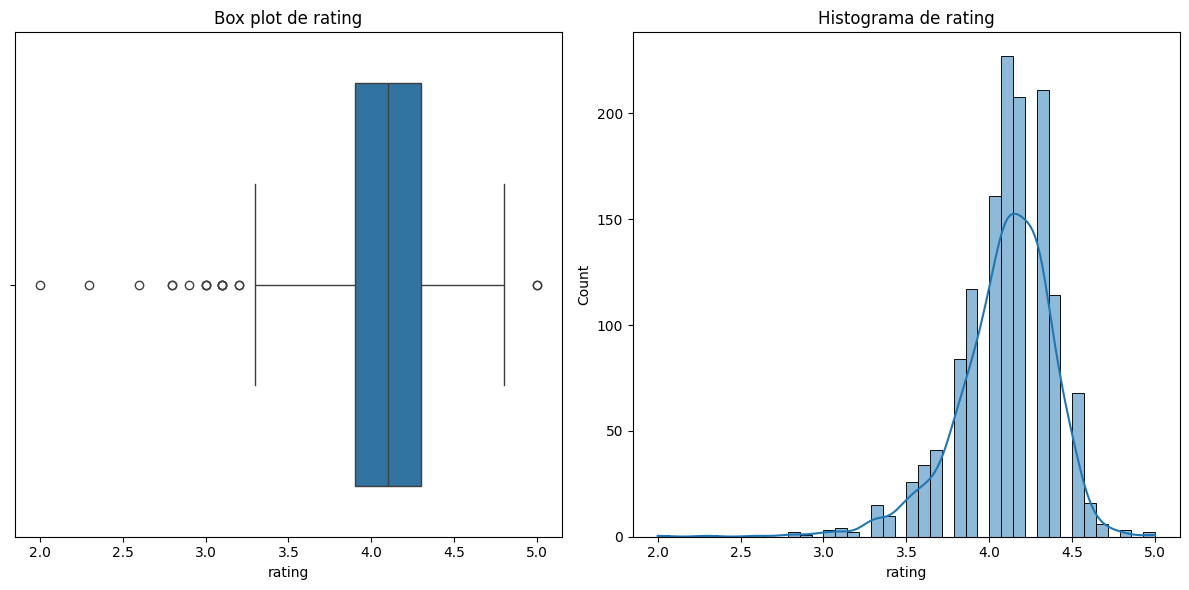

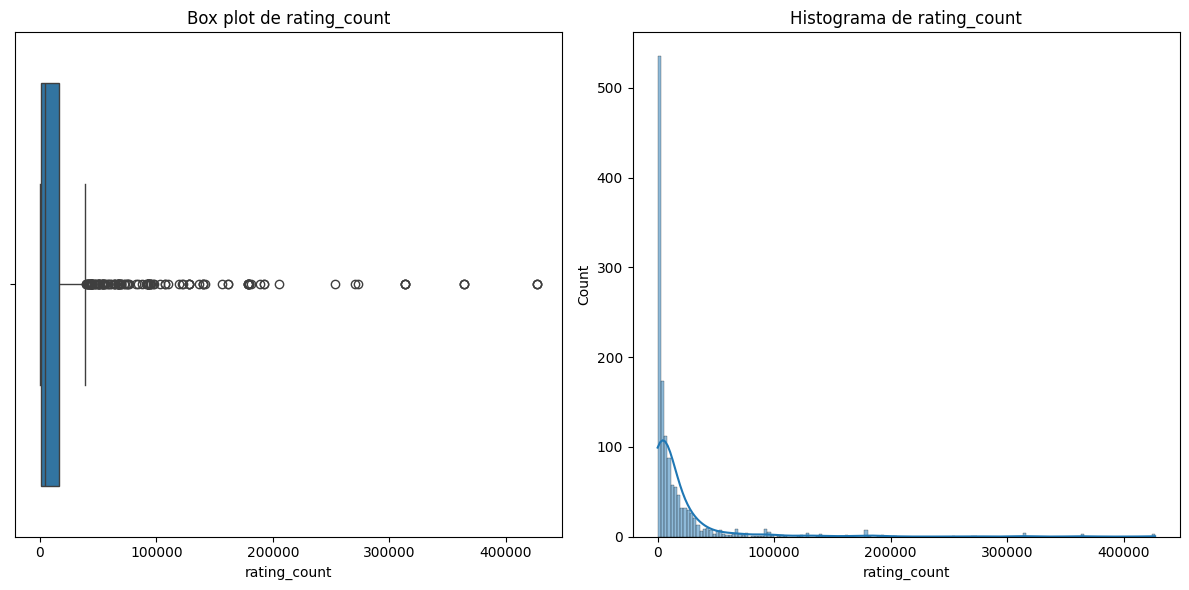


Visualização da distribuição para colunas numéricas em product_df:


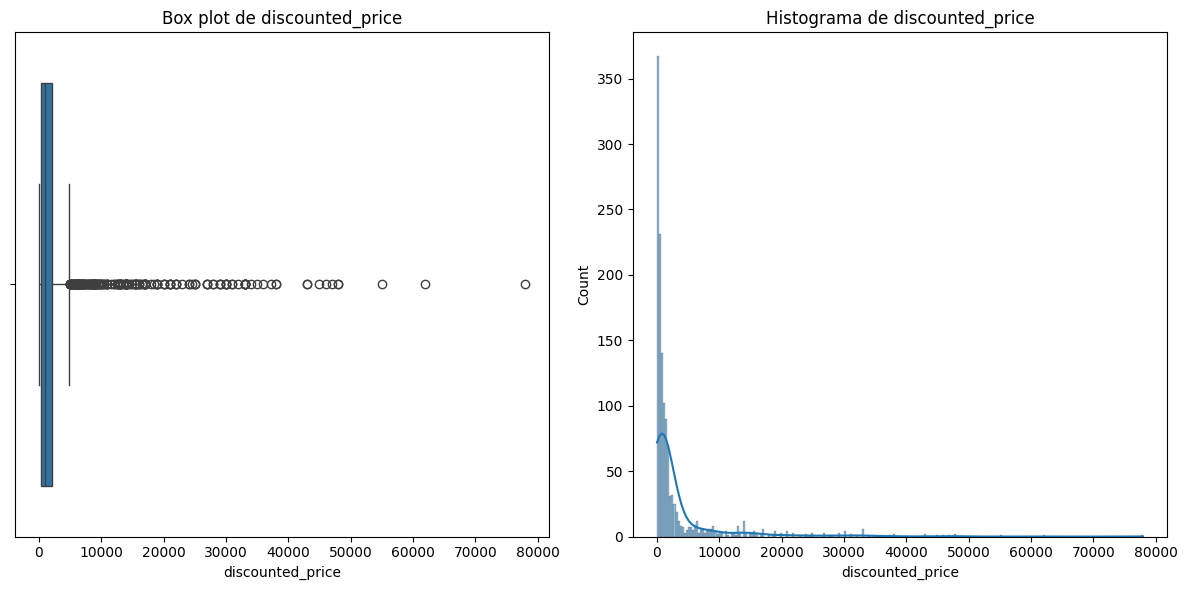

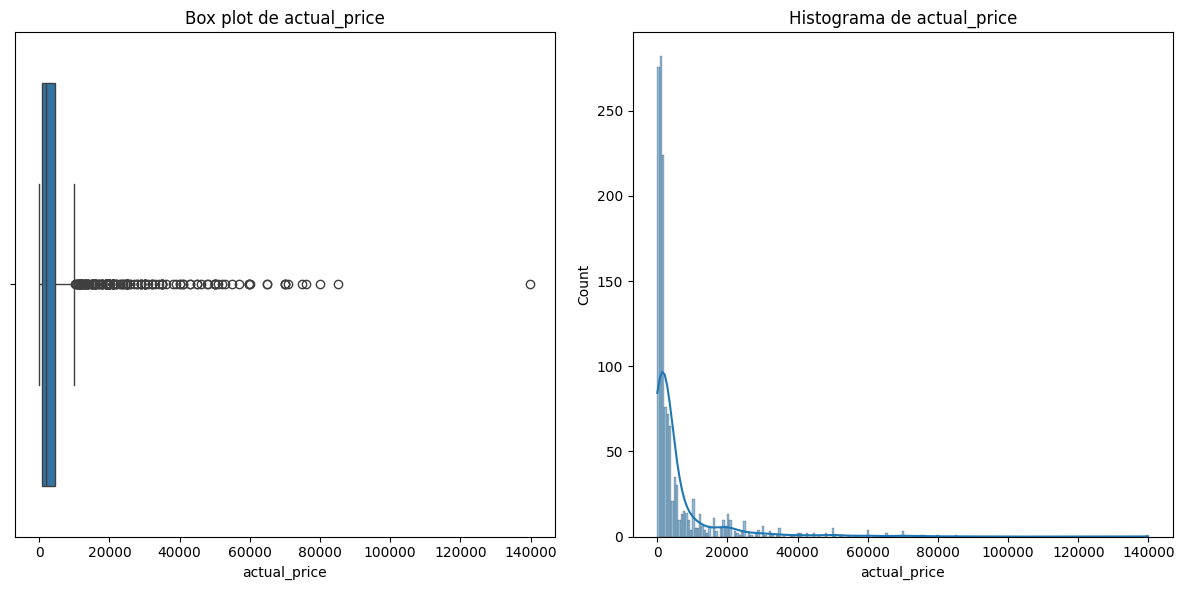

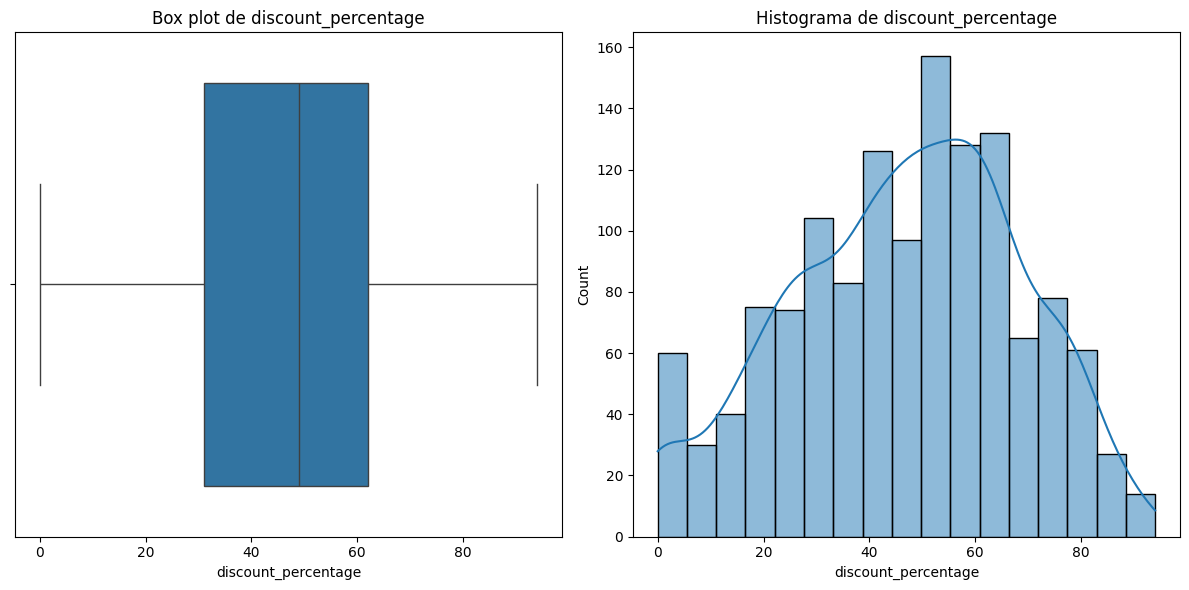

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização para colunas numéricas em review_df
print("Visualização da distribuição para colunas numéricas em review_df:")
for col in review_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.boxplot(x=review_df[col])
    plt.title(f'Box plot de {col}')

    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.histplot(review_df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.tight_layout()
    plt.show()

# Visualização para colunas numéricas em product_df
print("\nVisualização da distribuição para colunas numéricas em product_df:")
for col in product_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.boxplot(x=product_df[col])
    plt.title(f'Box plot de {col}')

    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.histplot(product_df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.tight_layout()
    plt.show()

## Análise visual das distribuições

Revisar os box plots e histogramas gerados para cada coluna numérica (`rating`, `rating_count` em `review_df`, e `discounted_price`, `actual_price` em `product_df`). Observar a forma da distribuição (simétrica, assimétrica).


## Apresentar a análise e recomendação

Summarizar as observações sobre a distribuição de cada coluna e apresentar a recomendação do método de detecção de outliers para cada coluna, justificando a escolha com base na visualização.


In [ ]:
print("Sumário das Observações e Recomendações para Detecção de Outliers:")

print("\n--- Coluna: rating (review_df) ---")
print("Distribuição: Ligeiramente assimétrica para a esquerda, próxima da simetria.")
print("Comparação de Métodos: Ambos, IQR e Z-Score (threshold=3), identificaram o mesmo número de outliers (19).")
print("Recomendação: Qualquer método (IQR ou Z-Score) é adequado devido à distribuição próxima da simetria. O IQR pode ser ligeiramente preferível por sua robustez a pequenas assimetrias.")

print("\n--- Coluna: rating_count (review_df) ---")
print("Distribuição: Altamente assimétrica para a direita com uma cauda longa.")
print("Comparação de Métodos: IQR identificou 130 outliers, enquanto Z-Score (threshold=3) identificou 28.")
print("Recomendação: O método IQR é recomendado para 'rating_count' devido à sua distribuição altamente assimétrica e cauda longa. O IQR é menos sensível a valores extremos do que o Z-Score e fornece uma detecção mais representativa dos outliers nesse tipo de distribuição.")

print("\n--- Coluna: discounted_price (product_df) ---")
print("Distribuição: Assimétrica para a direita com cauda longa.")
print("Comparação de Métodos: IQR identificou 209 outliers, enquanto Z-Score (threshold=3) identificou 40.")
print("Recomendação: O método IQR é recomendado para 'discounted_price' devido à sua distribuição assimétrica para a direita e cauda longa. O IQR é mais robusto para identificar outliers em dados que não seguem uma distribuição normal.")

print("\n--- Coluna: actual_price (product_df) ---")
print("Distribuição: Assimétrica para a direita com cauda longa.")
print("Comparação de Métodos: IQR identificou 185 outliers, enquanto Z-Score (threshold=3) identificou 36.")
print("Recomendação: O método IQR é recomendado para 'actual_price' devido à sua distribuição assimétrica para a direita e cauda longa, similar a 'discounted_price'. O IQR é mais apropriado para capturar outliers em distribuições não normais.")

Sumário das Observações e Recomendações para Detecção de Outliers:

--- Coluna: rating (review_df) ---
Distribuição: Ligeiramente assimétrica para a esquerda, próxima da simetria.
Comparação de Métodos: Ambos, IQR e Z-Score (threshold=3), identificaram o mesmo número de outliers (19).
Recomendação: Qualquer método (IQR ou Z-Score) é adequado devido à distribuição próxima da simetria. O IQR pode ser ligeiramente preferível por sua robustez a pequenas assimetrias.

--- Coluna: rating_count (review_df) ---
Distribuição: Altamente assimétrica para a direita com uma cauda longa.
Comparação de Métodos: IQR identificou 130 outliers, enquanto Z-Score (threshold=3) identificou 28.
Recomendação: O método IQR é recomendado para 'rating_count' devido à sua distribuição altamente assimétrica e cauda longa. O IQR é menos sensível a valores extremos do que o Z-Score e fornece uma detecção mais representativa dos outliers nesse tipo de distribuição.

--- Coluna: discounted_price (product_df) ---
Distr

# Criar Variáveis

**Diferença de Preço:** Representa a economia em reais obtida com o desconto, calculada subtraindo o preço com desconto do preço original do produto.

**Categoria Principal:** Corresponde ao primeiro nível da hierarquia da categoria do produto, agrupando-os de forma simplificada para facilitar comparações entre grandes grupos.

In [ ]:
# Criando duas novas variáveis diferenca_preco e categoria_principal
# Criar a coluna 'diferenca_preco'
# Certifique-se de que 'actual_price' e 'discounted_price' são numéricos
product_df['diferenca_preco'] = product_df['actual_price'] - product_df['discounted_price']

# Criar a coluna 'categoria_principal'
# Extrair a primeira categoria antes do primeiro '|'
product_df['categoria_principal'] = product_df['category'].astype(str).str.split('|', expand=True)[0]

print("Primeiras 5 linhas do dataframe product_df com as novas colunas:")
display(product_df.head())

Primeiras 5 linhas do dataframe product_df com as novas colunas:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,diferenca_preco,categoria_principal
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,High Compatibility : Compatible With iPhone 12...,700.0,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,"Compatible with all Type C enabled devices, be...",150.0,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,【 Fast Charger& Data Sync】-With built-in safet...,1700.0,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,The boAt Deuce USB 300 2 in 1 cable is compati...,370.0,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,[CHARGE & SYNC FUNCTION]- This cable comes wit...,245.0,Computers&Accessories


# Unir Tabelas

In [ ]:
# Unir os dataframes product_df e review_df usando a coluna 'product_id'
# Usamos um 'inner' join para incluir apenas produtos que têm avaliações e vice-versa
unificada_df = pd.merge(product_df, review_df, on='product_id', how='inner')

print("Primeiras 5 linhas do dataframe unido:")
display(unificada_df.head())

print("\nNúmero de linhas e colunas no dataframe unido:")
display(unificada_df.shape)

Primeiras 5 linhas do dataframe unido:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,diferenca_preco,categoria_principal,user_id,user_name,review_id,review_title,review_content,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,High Compatibility : Compatible With iPhone 12...,700.0,Computers&Accessories,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,4.2,24269.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,"Compatible with all Type C enabled devices, be...",150.0,Computers&Accessories,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,4.0,43994.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,【 Fast Charger& Data Sync】-With built-in safet...,1700.0,Computers&Accessories,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",3.9,7928.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,The boAt Deuce USB 300 2 in 1 cable is compati...,370.0,Computers&Accessories,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",4.2,94363.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,[CHARGE & SYNC FUNCTION]- This cable comes wit...,245.0,Computers&Accessories,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",4.2,16905.0



Número de linhas e colunas no dataframe unido:


(1358, 16)

In [ ]:
# contagem de valores nulos após união das tabelas
print("Contagem de valores nulos no dataframe unido:")
display(unificada_df.isnull().sum())

Contagem de valores nulos no dataframe unido:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
about_product,0
diferenca_preco,0
categoria_principal,0
user_id,0


# Agrupar dados de acordo com variáveis categóricas

In [ ]:
# Group by 'categoria_principal' and calculate mean of numerical columns
categoria_principal_grouped = unificada_df.groupby('categoria_principal').agg(
    mean_discounted_price=('discounted_price', 'mean'),
    mean_actual_price=('actual_price', 'mean'),
    mean_discount_percentage=('discount_percentage', 'mean'),
    mean_diferenca_preco=('diferenca_preco', 'mean'),
    mean_rating=('rating', 'mean'),
    mean_rating_count=('rating_count', 'mean'),
    product_count=('product_id', 'count') # Count products in each category
).reset_index()

print("Agregação por categoria_principal:")
display(categoria_principal_grouped)

# Calculate the percentage of products in each category relative to the total number of products
total_products = unificada_df.shape[0]
categoria_principal_grouped['percentage_of_products'] = (categoria_principal_grouped['product_count'] / total_products) * 100

print("\nAgregação por categoria_principal com porcentagem de produtos:")
display(categoria_principal_grouped)

Agregação por categoria_principal:


,categoria_principal,mean_discounted_price,mean_actual_price,mean_discount_percentage,mean_diferenca_preco,mean_rating,mean_rating_count,product_count
0,Car&Motorbike,2339.000000,4000.000000,42.000000,1661.000000,3.800000,1118.000000,1
1,Computers&Accessories,943.252944,1850.984828,53.326260,907.731883,4.153581,17026.026525,377
2,Electronics,6172.820565,10364.608871,50.120968,4191.788306,4.077823,29240.120968,496
3,Health&PersonalCare,899.000000,1900.000000,53.000000,1001.000000,4.000000,3663.000000,1
4,Home&Kitchen,2331.133803,4165.794183,40.174497,1834.660380,4.040716,6689.210291,447
5,HomeImprovement,337.000000,799.000000,57.500000,462.000000,4.250000,4283.000000,2
6,MusicalInstruments,638.000000,1347.000000,46.000000,709.000000,3.900000,44441.000000,2
7,OfficeProducts,301.580645,397.193548,12.354839,95.612903,4.309677,4828.225806,31
8,Toys&Games,150.000000,150.000000,0.000000,0.000000,4.300000,15867.000000,1



Agregação por categoria_principal com porcentagem de produtos:


,categoria_principal,mean_discounted_price,mean_actual_price,mean_discount_percentage,mean_diferenca_preco,mean_rating,mean_rating_count,product_count,percentage_of_products
0,Car&Motorbike,2339.000000,4000.000000,42.000000,1661.000000,3.800000,1118.000000,1,0.073638
1,Computers&Accessories,943.252944,1850.984828,53.326260,907.731883,4.153581,17026.026525,377,27.761414
2,Electronics,6172.820565,10364.608871,50.120968,4191.788306,4.077823,29240.120968,496,36.524300
3,Health&PersonalCare,899.000000,1900.000000,53.000000,1001.000000,4.000000,3663.000000,1,0.073638
4,Home&Kitchen,2331.133803,4165.794183,40.174497,1834.660380,4.040716,6689.210291,447,32.916053
5,HomeImprovement,337.000000,799.000000,57.500000,462.000000,4.250000,4283.000000,2,0.147275
6,MusicalInstruments,638.000000,1347.000000,46.000000,709.000000,3.900000,44441.000000,2,0.147275
7,OfficeProducts,301.580645,397.193548,12.354839,95.612903,4.309677,4828.225806,31,2.282769
8,Toys&Games,150.000000,150.000000,0.000000,0.000000,4.300000,15867.000000,1,0.073638


# Ver variáveis ​​categóricas

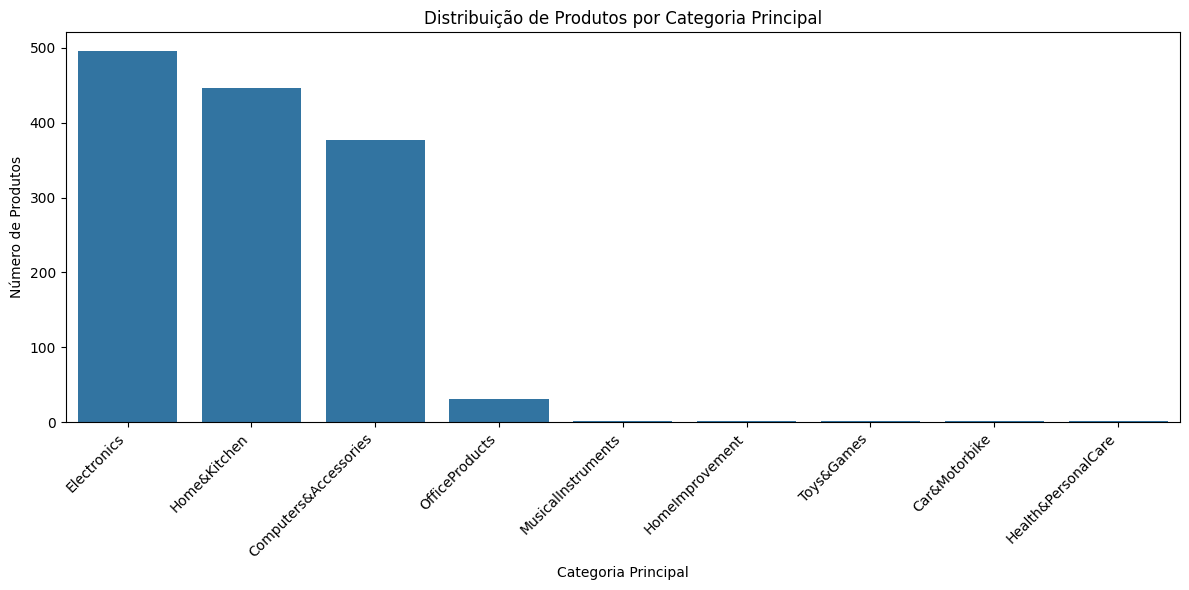

In [ ]:
# Contar a frequência de cada categoria principal
categoria_principal_counts = unificada_df['categoria_principal'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=categoria_principal_counts.index, y=categoria_principal_counts.values)
plt.title('Distribuição de Produtos por Categoria Principal')
plt.xlabel('Categoria Principal')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Proporção de cada Categoria Principal:
categoria_principal
Electronics              36.524300
Home&Kitchen             32.916053
Computers&Accessories    27.761414
OfficeProducts            2.282769
MusicalInstruments        0.147275
HomeImprovement           0.147275
Toys&Games                0.073638
Car&Motorbike             0.073638
Health&PersonalCare       0.073638
Name: proportion, dtype: float64


/tmp/ipython-input-28-3470324653.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_4_categorias.index, y=top_4_categorias.values, palette='viridis')


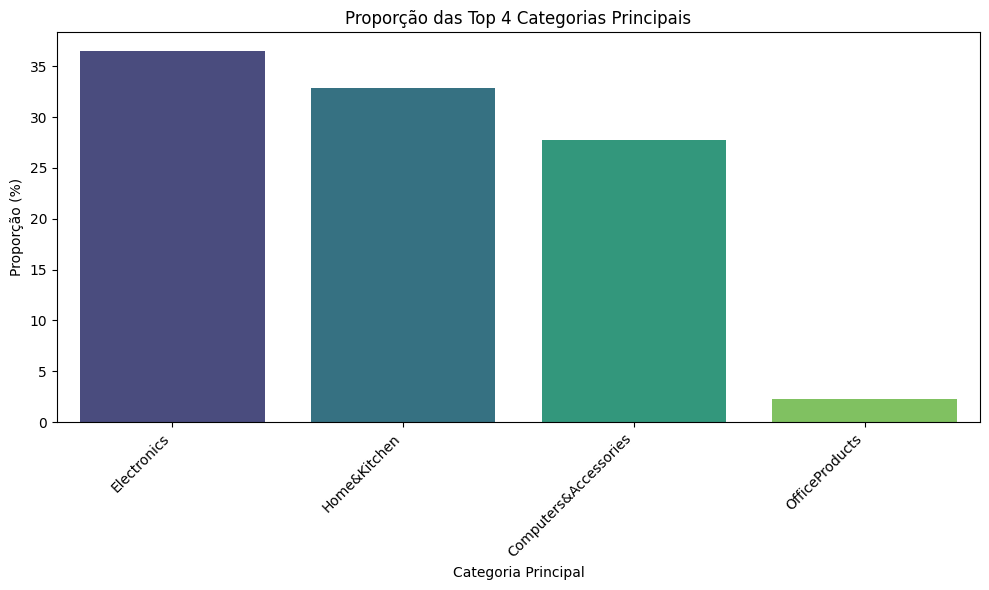

In [ ]:
# Calcular a proporção das categorias principais
proporcao_categorias = unificada_df['categoria_principal'].value_counts(normalize=True) * 100

print("Proporção de cada Categoria Principal:")
print(proporcao_categorias)

# Selecionar as top 4 categorias
top_4_categorias = proporcao_categorias.head(4)

# Criar gráfico de barras para visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=top_4_categorias.index, y=top_4_categorias.values, palette='viridis')
plt.title('Proporção das Top 4 Categorias Principais')
plt.xlabel('Categoria Principal')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Medidas de Tendência Central

In [ ]:
# Selecionar colunas numéricas
numerical_cols = unificada_df.select_dtypes(include=np.number).columns

print("Estatísticas de Tendência Central para Variáveis Numéricas:")

# Calcular Média, Mediana e Moda para cada coluna numérica
for col in numerical_cols:
    mean_val = unificada_df[col].mean()
    median_val = unificada_df[col].median()
    mode_val = unificada_df[col].mode()

    print(f"\n--- Coluna: {col} ---")
    print(f"Média: {mean_val:.2f}")
    print(f"Mediana: {median_val:.2f}")
    # Mode can have multiple values, so handle accordingly
    print(f"Moda: {list(mode_val.round(2))}")

Estatísticas de Tendência Central para Variáveis Numéricas:

--- Coluna: discounted_price ---
Média: 3294.57
Mediana: 899.00
Moda: [299.0]

--- Coluna: actual_price ---
Média: 5687.36
Mediana: 1795.00
Moda: [999.0]

--- Coluna: discount_percentage ---
Média: 46.84
Mediana: 49.00
Moda: [50]

--- Coluna: diferenca_preco ---
Média: 2392.79
Mediana: 803.50
Moda: [0.0]

--- Coluna: rating ---
Média: 4.09
Mediana: 4.10
Moda: [4.1]

--- Coluna: rating_count ---
Média: 17805.42
Mediana: 4863.00
Moda: [9378.0]


Para as variáveis discounted_price, actual_price, diferenca_preco e rating_count, onde identificamos outliers e distribuições assimétricas, a mediana é de fato uma melhor representação do valor central do que a média, pois não é distorcida pelos valores atípicos

 # Aplicar medidas de dispersão

In [ ]:
print("Medidas de Dispersão para Variáveis Numéricas:")

# Calcular Desvio Padrão, Variância e Intervalo Interquartílico para cada coluna numérica
for col in numerical_cols:
    std_dev = unificada_df[col].std()
    variance = unificada_df[col].var()
    Q1 = unificada_df[col].quantile(0.25)
    Q3 = unificada_df[col].quantile(0.75)
    IQR = Q3 - Q1

    print(f"\n--- Coluna: {col} ---")
    print(f"Desvio Padrão: {std_dev:.2f}")
    print(f"Variância: {variance:.2f}")
    print(f"Intervalo Interquartílico (IQR): {IQR:.2f}")

Medidas de Dispersão para Variáveis Numéricas:

--- Coluna: discounted_price ---
Desvio Padrão: 7157.17
Variância: 51225039.88
Intervalo Interquartílico (IQR): 1827.50

--- Coluna: actual_price ---
Desvio Padrão: 11191.95
Variância: 125259740.36
Intervalo Interquartílico (IQR): 3738.50

--- Coluna: discount_percentage ---
Desvio Padrão: 21.65
Variância: 468.53
Intervalo Interquartílico (IQR): 31.75

--- Coluna: diferenca_preco ---
Desvio Padrão: 4727.66
Variância: 22350725.68
Intervalo Interquartílico (IQR): 1620.75

--- Coluna: rating ---
Desvio Padrão: 0.29
Variância: 0.09
Intervalo Interquartílico (IQR): 0.40

--- Coluna: rating_count ---
Desvio Padrão: 42161.54
Variância: 1777595836.57
Intervalo Interquartílico (IQR): 15370.00


Pelo output, rating_count e diferenca_preco têm desvios padrão altos, o que confirma a grande variação nesses valores que vimos nos box plots. O rating tem um **desvio padrão baixo**, indicando que as avaliações tendem a estar mais próximas da média (entre 4 e 5).

# Correlação entre variáveis numéricas

In [ ]:
# Calcular a matriz de correlação de Pearson para as variáveis numéricas
correlation_matrix = unificada_df[numerical_cols].corr(method='pearson')

print("Matriz de Correlação de Pearson entre as variáveis numéricas:")
display(correlation_matrix)

Matriz de Correlação de Pearson entre as variáveis numéricas:


,discounted_price,actual_price,discount_percentage,diferenca_preco,rating,rating_count
discounted_price,1.000000,0.962103,-0.237639,0.763728,0.127307,-0.025049
actual_price,0.962103,1.000000,-0.112198,0.910814,0.128014,-0.034842
discount_percentage,-0.237639,-0.112198,1.000000,0.094150,-0.162386,0.007621
diferenca_preco,0.763728,0.910814,0.094150,1.000000,0.110324,-0.044561
rating,0.127307,0.128014,-0.162386,0.110324,1.000000,0.098156
rating_count,-0.025049,-0.034842,0.007621,-0.044561,0.098156,1.000000


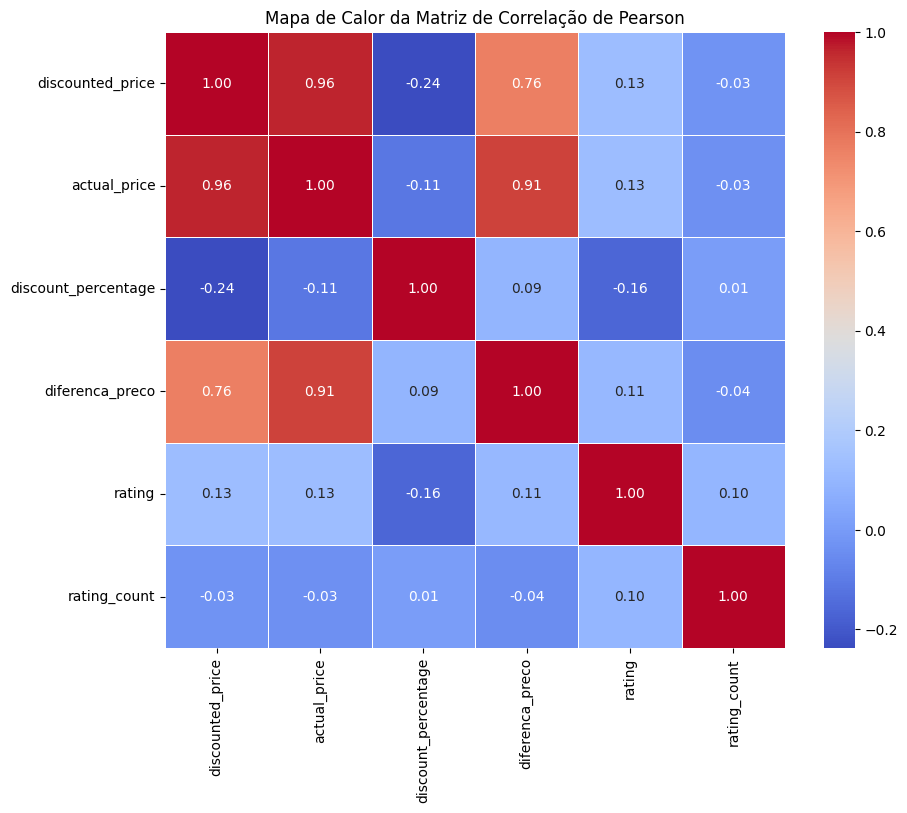

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação de Pearson')
plt.show()

### **Resumo dos Resultados de Correlação:**

- **Fortes Correlações Positivas:**
    - `discounted_price` e `actual_price` (~0.96),
    - `actual_price` e `diferenca_preco` (~0.91),
    - `discounted_price` e `diferenca_preco` (~0.76).
        
        Essas relações mostram que preços mais altos, com ou sem desconto, estão fortemente associados entre si e com maiores valores de desconto absoluto — o que é esperado.
        
- **Correlações Fracas:**
    - `rating` e `rating_count` têm correlação fraca com variáveis de preço e desconto, indicando pouca ou nenhuma relação linear entre avaliação dos produtos e seus preços ou descontos.
- **Correlações Negativas Fracas a Moderadas:**
    - `discount_percentage` com `discounted_price` (–0.24) e `actual_price` (–0.11).
        
        Produtos com maior percentual de desconto tendem a ter preços mais baixos, sugerindo que itens mais baratos recebem descontos percentuais maiores.

In [ ]:
# Criar segmentos com base na categoria principal
segmented_by_categoria_principal = unificada_df.groupby('categoria_principal')

# Exibir o resumo estatístico para cada segmento (categoria principal)
print("Resumo Estatístico por Categoria Principal:")
display(segmented_by_categoria_principal.describe())

Resumo Estatístico por Categoria Principal:


discounted_price                                     \
                                 count         mean           std     min   
categoria_principal                                                         
Car&Motorbike                      1.0  2339.000000           NaN  2339.0   
Computers&Accessories            377.0   943.252944   2598.466809    39.0   
Electronics                      496.0  6172.820565  10508.510464    79.0   
Health&PersonalCare                1.0   899.000000           NaN   899.0   
Home&Kitchen                     447.0  2331.133803   3471.271525    79.0   
HomeImprovement                    2.0   337.000000    124.450793   249.0   
MusicalInstruments                 2.0   638.000000    226.274170   478.0   
OfficeProducts                    31.0   301.580645    317.288699    50.0   
Toys&Games                         1.0   150.000000           NaN   150.0   

                                                        actual_price  \
                          25%     50%      75%      max        count   
categoria_principal                                                    
Car&Motorbike          2339.0  2339.0  2339.00   2339.0          1.0   
Computers&Accessories   249.0   399.0   849.00  37247.0        377.0   
Electronics             399.0  1399.0  7935.75  77990.0        496.0   
Health&PersonalCare     899.0   899.0   899.00    899.0          1.0   
Home&Kitchen            630.0  1199.0  2696.50  42990.0        447.0   
HomeImprovement         293.0   337.0   381.00    425.0          2.0   
MusicalInstruments      558.0   638.0   718.00    798.0          2.0   
OfficeProducts          117.0   178.0   380.50   1399.0         31.0   
Toys&Games              150.0   150.0   150.00    150.0          1.0   

                                     ... rating      rating_count  \
                               mean  ...    75%  max        count   
categoria_principal                  ...                            
Car&Motorbike           4000.000000  ...  3.800  3.8          1.0   
Computers&Accessories   1850.984828  ...  4.300  5.0        377.0   
Electronics            10364.608871  ...  4.300  4.7        496.0   
Health&PersonalCare     1900.000000  ...  4.000  4.0          1.0   
Home&Kitchen            4165.794183  ...  4.200  4.8        447.0   
HomeImprovement          799.000000  ...  4.375  4.5          2.0   
MusicalInstruments      1347.000000  ...  3.950  4.0          2.0   
OfficeProducts           397.193548  ...  4.400  4.5         31.0   
Toys&Games               150.000000  ...  4.300  4.3          1.0   

                                                                              \
                               mean           std      min      25%      50%   
categoria_principal                                                            
Car&Motorbike           1118.000000           NaN   1118.0   1118.0   1118.0   
Computers&Accessories  17026.026525  31000.986310      5.0   1667.0   7318.0   
Electronics            29240.120968  60316.664745      7.0   1633.5   9359.0   
Health&PersonalCare     3663.000000           NaN   3663.0   3663.0   3663.0   
Home&Kitchen            6689.210291  16454.176198      2.0    550.0   2311.0   
HomeImprovement         4283.000000   2406.991483   2581.0   3432.0   4283.0   
MusicalInstruments     44441.000000  34256.495121  20218.0  32329.5  44441.0   
OfficeProducts          4828.225806   2853.095766    388.0   2844.5   4426.0   
Toys&Games             15867.000000           NaN  15867.0  15867.0  15867.0   

                                          
                           75%       max  
categoria_principal                       
Car&Motorbike           1118.0    1118.0  
Computers&Accessories  20053.0  253105.0  
Electronics            27850.0  426973.0  
Health&PersonalCare     3663.0    3663.0  
Home&Kitchen            7257.5  270563.0  
HomeImprovement         5134.0    5985.0  
MusicalInstruments     56552.5   68664.0  
OfficeProduc

# Validação de hipóteses

### Hipótese 1 - Quanto maior o desconto, melhor será a pontuação


--- Análise da Hipótese 1: Desconto vs. Pontuação ---
Correlação de Spearman entre Desconto e Rating: -0.1512, P-valor: 0.0000


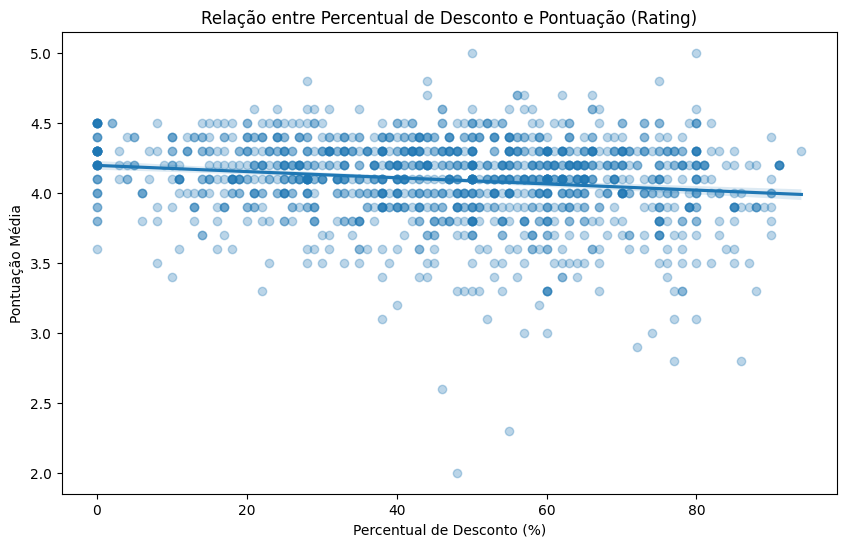

In [ ]:
# Hipótese 1: Quanto maior o desconto, melhor será a pontuação.
print("\n--- Análise da Hipótese 1: Desconto vs. Pontuação ---")

# Correlação de Spearman (mais robusta a outliers e relações não lineares)
spearman_corr_h1, spearman_p_value_h1 = stats.spearmanr(unificada_df['discount_percentage'], unificada_df['rating'])
print(f"Correlação de Spearman entre Desconto e Rating: {spearman_corr_h1:.4f}, P-valor: {spearman_p_value_h1:.4f}")

# Visualização (Scatter plot com linha de regressão)
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_percentage', y='rating', data=unificada_df, scatter_kws={'alpha':0.3})
plt.title('Relação entre Percentual de Desconto e Pontuação (Rating)')
plt.xlabel('Percentual de Desconto (%)')
plt.ylabel('Pontuação Média')
plt.show()

A correlação negativa fraca encontrada indica que, no conjunto de dados analisado, existe uma tendência sutil de que produtos com maiores descontos recebam pontuações ligeiramente menores. Apesar de a força da correlação ser baixa, o resultado é estatisticamente significativo, o que nos permite rejeitar a hipótese nula de ausência de correlação.

### Hipótese 2 - Quanto maior o número de pessoas que avaliaram o produto, melhor será a classificação


--- Análise da Hipótese 2: Número de Avaliações vs. Classificação ---
Correlação de Pearson entre Rating Count e Rating: 0.0982, P-valor: 0.0003
Correlação de Spearman entre Rating Count e Rating: 0.1902, P-valor: 0.0000


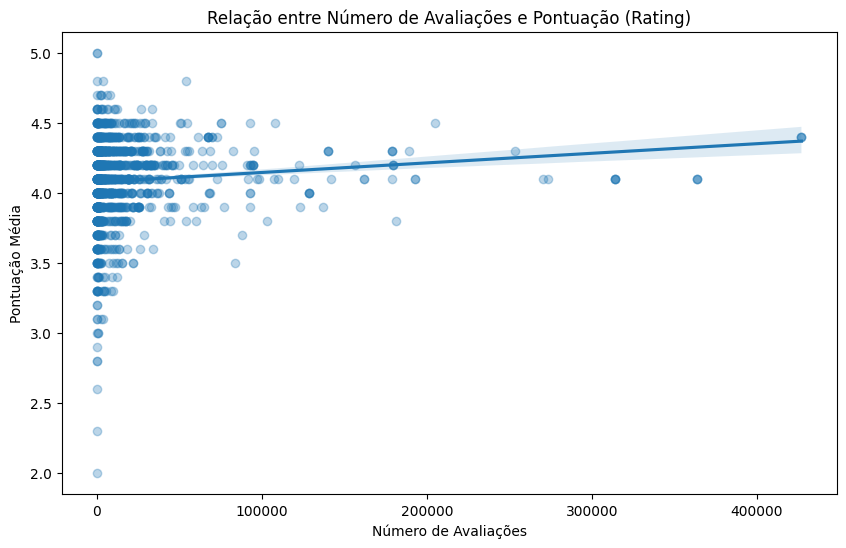

In [ ]:
# Hipótese 2: Quanto maior o número de pessoas que avaliaram o produto, melhor será a classificação.
print("\n--- Análise da Hipótese 2: Número de Avaliações vs. Classificação ---")

# Correlação de Pearson
pearson_corr_h2, pearson_p_value_h2 = stats.pearsonr(unificada_df['rating_count'], unificada_df['rating'])
print(f"Correlação de Pearson entre Rating Count e Rating: {pearson_corr_h2:.4f}, P-valor: {pearson_p_value_h2:.4f}")

# Correlação de Spearman
spearman_corr_h2, spearman_p_value_h2 = stats.spearmanr(unificada_df['rating_count'], unificada_df['rating'])
print(f"Correlação de Spearman entre Rating Count e Rating: {spearman_corr_h2:.4f}, P-valor: {spearman_p_value_h2:.4f}")

# Visualização para a Hipótese 2: Número de Avaliações vs. Classificação
plt.figure(figsize=(10, 6))
sns.regplot(x='rating_count', y='rating', data=unificada_df, scatter_kws={'alpha':0.3}) # scatter_kws para ajustar a transparência dos pontos
plt.title('Relação entre Número de Avaliações e Pontuação (Rating)')
plt.xlabel('Número de Avaliações')
plt.ylabel('Pontuação Média')
plt.show()

Existe uma leve tendência de que produtos mais avaliados tenham notas um pouco maiores, mas essa relação é fraca e não pode ser considerada um fator determinante da qualidade percebida. Portanto, embora os dados indiquem uma leve relação positiva, o número de avaliações por si só não é um bom preditor da pontuação média de um produto, logo, não podemos confirmar a hipótese.

### Hipótese 3 - Produtos com preços reais mais altos (sem desconto aplicado) tendem a ter uma avaliação maior?


--- Análise da Hipótese 3: Preço Real vs. Avaliação ---
Correlação de Pearson entre Preço Real e Rating: 0.1280, P-valor: 0.0000
Correlação de Spearman entre Preço Real e Rating: 0.0325, P-valor: 0.2320


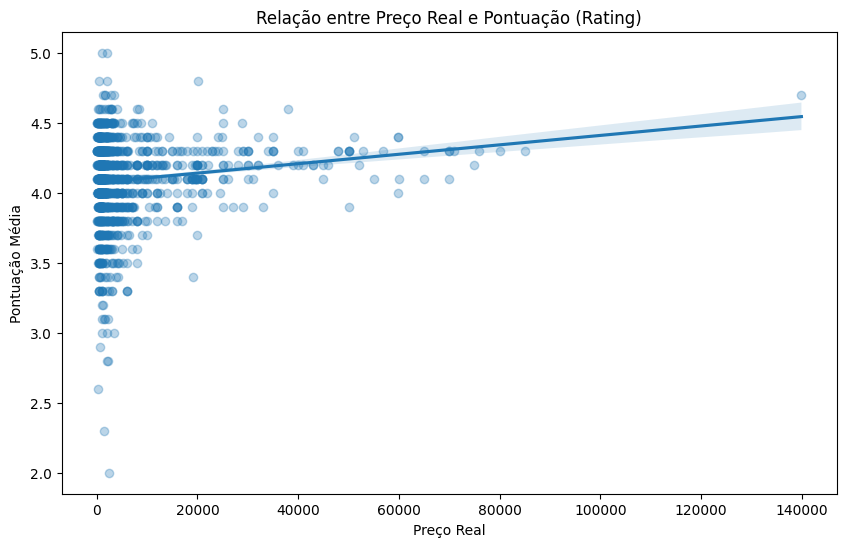

In [ ]:
# Hipótese 3: Produtos com preços reais mais altos (sem desconto aplicado) tendem a ter uma avaliação maior.
print("\n--- Análise da Hipótese 3: Preço Real vs. Avaliação ---")

# Correlação de Pearson
pearson_corr_h3, pearson_p_value_h3 = stats.pearsonr(unificada_df['actual_price'].fillna(0), unificada_df['rating']) # fillna(0) apenas para o cálculo da correlação se houver NaN
print(f"Correlação de Pearson entre Preço Real e Rating: {pearson_corr_h3:.4f}, P-valor: {pearson_p_value_h3:.4f}")

# Correlação de Spearman
spearman_corr_h3, spearman_p_value_h3 = stats.spearmanr(unificada_df['actual_price'].fillna(0), unificada_df['rating'])
print(f"Correlação de Spearman entre Preço Real e Rating: {spearman_corr_h3:.4f}, P-valor: {spearman_p_value_h3:.4f}")

# Visualização para a Hipótese 3: Preço Real vs. Avaliação
plt.figure(figsize=(10, 6))
sns.regplot(x='actual_price', y='rating', data=unificada_df, scatter_kws={'alpha':0.3}) # scatter_kws para ajustar a transparência dos pontos
plt.title('Relação entre Preço Real e Pontuação (Rating)')
plt.xlabel('Preço Real')
plt.ylabel('Pontuação Média')
plt.show()

Apesar da correlação de Pearson apontar uma fraca relação positiva entre preço real e pontuação média, essa evidência não é consistente, pois a correlação de Spearman não confirmou o resultado. Portanto, o preço real não é um bom indicador de qualidade percebida (rating). Isso sugere que outros fatores, como marca, funcionalidade, experiência do usuário ou marketing, influenciam mais fortemente a avaliação dos produtos.

### Hipótese 4 - Produtos com um preço real mais alto tendem a ter descontos absolutos maiores (ou seja, o valor do desconto em R$)?


--- Análise da Hipótese 4: Preço Real vs. Diferença de Preço ---
Correlação de Pearson entre Preço Real e Diferença de Preço: 0.9108, P-valor: 0.0000
Correlação de Spearman entre Preço Real e Diferença de Preço: 0.8952, P-valor: 0.0000


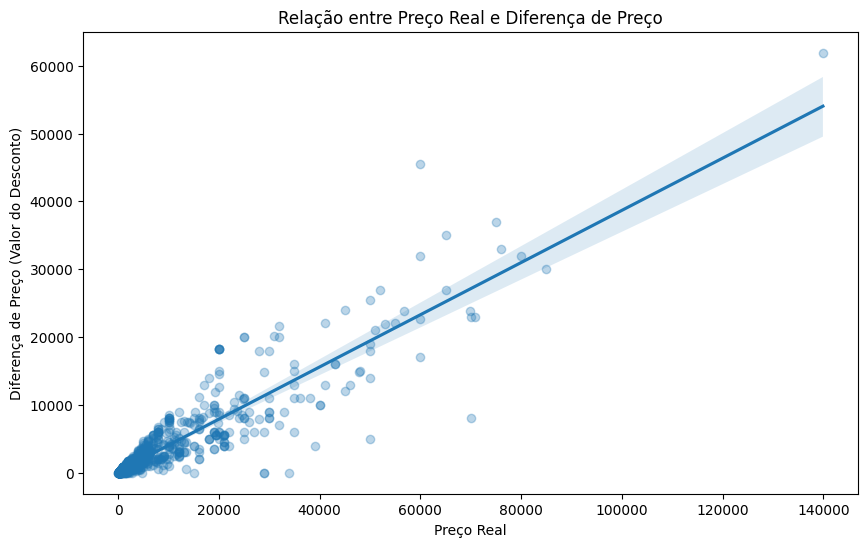

In [ ]:
# Hipótese 4: Produtos com um preço real mais alto tendem a ter descontos absolutos maiores (ou seja, o valor do desconto em R$)
print("\n--- Análise da Hipótese 4: Preço Real vs. Diferença de Preço ---")

# Correlação de Pearson
pearson_corr_h4, pearson_p_value_h4 = stats.pearsonr(unificada_df['actual_price'].fillna(0), unificada_df['diferenca_preco'].fillna(0))
print(f"Correlação de Pearson entre Preço Real e Diferença de Preço: {pearson_corr_h4:.4f}, P-valor: {pearson_p_value_h4:.4f}")

# Correlação de Spearman
spearman_corr_h4, spearman_p_value_h4 = stats.spearmanr(unificada_df['actual_price'].fillna(0), unificada_df['diferenca_preco'].fillna(0))
print(f"Correlação de Spearman entre Preço Real e Diferença de Preço: {spearman_corr_h4:.4f}, P-valor: {spearman_p_value_h4:.4f}")

# Visualização para a Hipótese 4: Preço Real vs. Diferença de Preço
plt.figure(figsize=(10, 6))
sns.regplot(x='actual_price', y='diferenca_preco', data=unificada_df, scatter_kws={'alpha':0.3}) # scatter_kws para ajustar a transparência dos pontos
plt.title('Relação entre Preço Real e Diferença de Preço')
plt.xlabel('Preço Real')
plt.ylabel('Diferença de Preço (Valor do Desconto)')
plt.show()

Esses valores indicam uma **relação positiva muito forte e estatisticamente significativa** entre o preço real e o valor do desconto. Ou seja, produtos mais caros tendem a apresentar maiores descontos absolutos, confirmando fortemente a **Hipótese 4**.

Além disso, um gráfico de dispersão confirmou visualmente essa tendência com uma clara linha ascendente, evidenciando uma forte relação linear.

# Confirmação da Hipótese 4 com Testes Complementares

Como a Hipótese 4 mostrou uma correlação forte e positiva entre o preço real e a diferença de preço no dataset geral, o próximo passo lógico é investigar se essa relação se mantém consistente em todas as categorias principais ou se existem variações significativas entre elas.

### Teste ANOVA para Comparar a Média da Diferença de Preço entre Categorias Principais

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Realizar o teste ANOVA
# A fórmula 'diferenca_preco ~ C(categoria_principal)' especifica que queremos comparar a média de 'diferenca_preco'
# entre os grupos definidos por 'categoria_principal'. C() indica que 'categoria_principal' é uma variável categórica.
model = ols('diferenca_preco ~ C(categoria_principal)', data=unificada_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Tabela ANOVA:")
display(anova_table)

# Interpretar o resultado do ANOVA
alpha = 0.05 # Nível de significância
p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print(f"\nO p-valor ({p_value:.4f}) é menor que o nível de significância ({alpha}).")
    print("Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa na média da diferença de preço entre as categorias principais.")
    print("\nPara saber quais categorias são diferentes, testes post-hoc (como Tukey HSD) seriam necessários.")
else:
    print(f"\nO p-valor ({p_value:.4f}) é maior que o nível de significância ({alpha}).")
    print("Não há evidências suficientes para rejeitar a hipótese nula.")
    print("A média da diferença de preço não é estatisticamente diferente entre as categorias principais neste dataset.")

Tabela ANOVA:


,sum_sq,df,F,PR(>F)
C(categoria_principal),2.760843e+09,8.0,16.886562,4.489483e-24
Residual,2.756909e+10,1349.0,NaN,NaN



O p-valor (0.0000) é menor que o nível de significância (0.05).
Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa na média da diferença de preço entre as categorias principais.

Para saber quais categorias são diferentes, testes post-hoc (como Tukey HSD) seriam necessários.


/tmp/ipython-input-38-2968391799.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


O ANOVA calcula uma **estatística F**, que indica o quanto as médias dos grupos são diferentes entre si. Em seguida, analisa o **p-valor**:

- Se o p-valor for **menor que 0,05**, concluímos que **existe pelo menos uma diferença significativa entre os grupos**.
- Se for **maior que 0,05**, não há evidência suficiente para afirmar que as médias são diferentes.

**O Resultado do ANOVA para a média da diferenca_preco entre as categorias principais foi:** p-valor = 4,49e-24

→ **Rejeita-se a hipótese nula**, indicando que há **diferenças estatisticamente significativas** na média de desconto entre as categorias.

Como o teste ANOVA apenas nos diz que existe uma diferença em algum lugar entre os grupos, mas não quais grupos são diferentes, o próximo passo natural seria realizar testes post-hoc, como o teste de Tukey HSD (Honestly Significant Difference). Isso permite comparar pares de categorias principais para identificar especificamente quais pares têm médias de diferenca_preco estatisticamente diferentes.

### Teste Post-Hoc de Tukey HSD para Comparar as Médias da Diferença de Preço entre Categorias Principais

O Teste de Tukey HSD (Honestly Significant Difference) é uma análise post-hoc, ou seja, é realizada após o teste ANOVA, quando já se sabe que há diferenças significativas entre grupos. Nesse caso, foi realizado para identificar quais pares de categorias apresentam diferenças estatisticamente significativas na média do desconto.

In [ ]:
# Realizar o teste post-hoc de Tukey HSD para comparar as médias da diferença de preço entre os pares de categorias principais. Isso nos ajudará a identificar quais categorias são significativamente diferentes umas das outras em termos do valor absoluto do desconto.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar o teste de Tukey HSD
# 'endog' é a variável dependente (a que estamos comparando as médias)
# 'groups' é a variável categórica (os grupos a serem comparados)
# 'alpha' é o nível de significância para o teste (geralmente 0.05)
tukey_result = pairwise_tukeyhsd(endog=unificada_df['diferenca_preco'],
                                 groups=unificada_df['categoria_principal'],
                                 alpha=0.05)

print("Resultado do Teste de Tukey HSD:")
display(tukey_result)

# Interpretação dos Resultados do Teste de Tukey HSD
print("\nInterpretação:")
print("A tabela acima mostra as comparações entre pares de categorias principais.")
print("- 'meandiff': A diferença nas médias da 'diferenca_preco' entre o par de grupos.")
print("- 'lower' e 'upper': O intervalo de confiança de 95% para a diferença média.")
print("- 'reject': Indica se a diferença média é estatisticamente significativa (True = rejeitar H0, False = não rejeitar H0) com base no alpha.")
print("- 'p-adj': O p-valor ajustado para comparações múltiplas. Se p-adj < alpha, a diferença entre aquele par de grupos é estatisticamente significativa.")

print("\nPares de Categorias com Diferenças Estatisticamente Significativas na Média da Diferença de Preço (p-adj < 0.05):")
significant_pairs = tukey_result.summary().data[1:] # Ignora o cabeçalho
for row in significant_pairs:
    group1, group2, meandiff, lower, upper, reject, p_adj = row
    if reject:
        print(f"- {group1} vs {group2}: Diferença Média = {meandiff:.2f}, p-adj = {p_adj:.4f}")

print("\nNote: Algumas categorias podem não aparecer em pares significativos se suas médias não forem estatisticamente diferentes de outras categorias.")

Resultado do Teste de Tukey HSD:



Interpretação:
A tabela acima mostra as comparações entre pares de categorias principais.
- 'meandiff': A diferença nas médias da 'diferenca_preco' entre o par de grupos.
- 'lower' e 'upper': O intervalo de confiança de 95% para a diferença média.
- 'reject': Indica se a diferença média é estatisticamente significativa (True = rejeitar H0, False = não rejeitar H0) com base no alpha.
- 'p-adj': O p-valor ajustado para comparações múltiplas. Se p-adj < alpha, a diferença entre aquele par de grupos é estatisticamente significativa.

Pares de Categorias com Diferenças Estatisticamente Significativas na Média da Diferença de Preço (p-adj < 0.05):
- Car&Motorbike vs Computers&Accessories: Diferença Média = -753.27, p-adj = 0.0000
- Car&Motorbike vs Electronics: Diferença Média = 2530.79, p-adj = 0.0000
- Car&Motorbike vs Health&PersonalCare: Diferença Média = -660.00, p-adj = 0.0000
- Car&Motorbike vs Home&Kitchen: Diferença Média = 173.66, p-adj = 0.0000
- Car&Motorbike vs HomeImprovement:

Esse teste compara todas as **possíveis combinações de pares de grupos, c**alcula a **diferença média entre os pares**, um **intervalo de confiança** e um **p-valor ajustado**. Se o **p-valor ajustado** for menor que 0,05 e o intervalo **não incluir zero**, a diferença entre os dois grupos é considerada **estatisticamente significativa**.

Foram identificados diversos pares de categorias com **diferenças significativas**. Por exemplo:

- *Computers & Accessories* oferece, em média, **₹753,27** a mais de desconto do que *Car & Motorbike* (p-adj < 0,0001).
- Outros pares, como *Electronics vs Home & Kitchen*, mesmo com diferenças observadas visualmente, **não apresentaram significância estatística** (p-adj = 1.0000).

A **Hipótese 4 foi confirmada**: existe uma forte relação positiva entre o preço real do produto e o valor absoluto do desconto. No entanto, essa relação **varia entre as categorias de produto**. Categorias como **Electronics** e **Home & Kitchen** tendem a oferecer os **maiores descontos absolutos médios**, enquanto outras, como *Car & Motorbike*, oferecem menos.

Essas análises mostram que, embora o preço real seja um fator chave na definição do valor do desconto, a **categoria do produto influencia significativamente o quanto, em média, é descontado**. Isso reforça a importância de considerar o contexto do produto ao interpretar políticas de precificação e promoção.

### Visualização da Média da Diferença de Preço por Categoria Principal

/tmp/ipython-input-40-961648281.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_diferenca_preco_por_categoria.index, y=mean_diferenca_preco_por_categoria.values, palette='viridis')


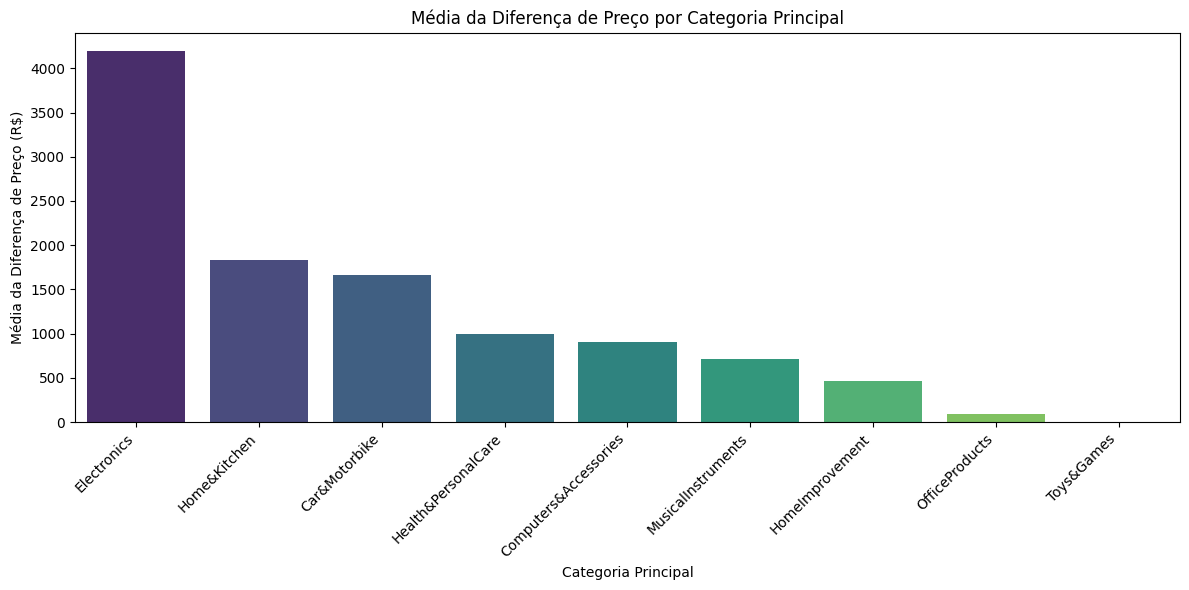

In [ ]:
# Calcular a média da diferenca_preco para cada categoria principal
mean_diferenca_preco_por_categoria = unificada_df.groupby('categoria_principal')['diferenca_preco'].mean().sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_diferenca_preco_por_categoria.index, y=mean_diferenca_preco_por_categoria.values, palette='viridis')
plt.title('Média da Diferença de Preço por Categoria Principal')
plt.xlabel('Categoria Principal')
plt.ylabel('Média da Diferença de Preço (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Ao analisar este gráfico em conjunto com os resultados do teste de Tukey HSD, você pode tirar as seguintes conclusões:

**Categorias com Maiores Descontos Absolutos Médios:** Visualmente, a categoria "Eletrônicos" parece ter a maior média de diferença de preço, seguida por "Home&Kitchen".

**Confirmação das Diferenças Estatísticas:** O teste de Tukey HSD confirmou que muitas dessas diferenças visuais são estatisticamente significativas. Por exemplo, a grande diferença entre "Electronics" e "Computers&Accessories" ou entre "Electronics" e "OfficeProducts" é estatisticamente suportada pelos resultados do Tukey.

**Categorias com Descontos Absolutos Médios Semelhantes:**  O teste de Tukey HSD também mostrou quais pares de categorias não têm diferenças estatisticamente significativas na média da diferença de preço, mesmo que haja uma pequena diferença visual no gráfico.

**O que isso mostra no contexto da Hipótese 4:**
Isso detalha a descoberta da Hipótese 4. Não apenas produtos com preços reais mais altos tendem a ter descontos absolutos maiores, mas essa tendência se manifesta de forma diferente entre as categorias. Algumas categorias, como "Electronics", são onde você encontra os maiores descontos em termos monetários, em média.

# Cálculo Risco Relativo

In [ ]:
# 1. Criar a variável binária "alta_avaliacao" (rating >= 4.0)
unificada_df['alta_avaliacao'] = (unificada_df['rating'] >= 4.0).astype(int)

# 2. Filtrar o DataFrame para incluir apenas as categorias "Electronics" e "Home&Kitchen"
grupos_comparacao_df = unificada_df[unificada_df['categoria_principal'].isin(['Electronics', 'Home&Kitchen'])].copy()

# 3. Criar a tabela de contingência 2x2
# Certifique-se de que a coluna 'categoria_principal' existe e não tem valores nulos nos dados filtrados
if 'categoria_principal' in grupos_comparacao_df.columns and not grupos_comparacao_df['categoria_principal'].isnull().any():
    tabela_contingencia = pd.crosstab(grupos_comparacao_df['categoria_principal'], grupos_comparacao_df['alta_avaliacao'])
    print("Tabela de Contingência:")
    display(tabela_contingencia)

    # Renomear as colunas para maior clareza (opcional)
    tabela_contingencia.columns = ['Baixa Avaliação', 'Alta Avaliação']
    tabela_contingencia.index.name = 'Categoria Principal'
    print("\nTabela de Contingência (com nomes claros):")
    display(tabela_contingencia)

    # 4. Calcular o Risco Relativo
    # Extrair os valores da tabela de contingência para o cálculo do RR
    # Assumindo que 'Electronics' é o grupo exposto e 'Home&Kitchen' o não exposto
    # E que 'Alta Avaliação' é a coluna 1 (índice 1)
    if 'Electronics' in tabela_contingencia.index and 'Home&Kitchen' in tabela_contingencia.index:
        a = tabela_contingencia.loc['Electronics', 'Alta Avaliação']       # Eletrônicos com alta avaliação
        b = tabela_contingencia.loc['Electronics', 'Baixa Avaliação']    # Eletrônicos sem alta avaliação
        c = tabela_contingencia.loc['Home&Kitchen', 'Alta Avaliação']      # Home&Kitchen com alta avaliação
        d = tabela_contingencia.loc['Home&Kitchen', 'Baixa Avaliação']   # Home&Kitchen sem alta avaliação

        # Evitar divisão por zero
        prob_electronics = a / (a + b) if (a + b) > 0 else 0
        prob_homekitchen = c / (c + d) if (c + d) > 0 else 0

        if prob_homekitchen > 0:
            risco_relativo = prob_electronics / prob_homekitchen
            print(f"\nProbabilidade de Alta Avaliação em Electronics: {prob_electronics:.4f}")
            print(f"Probabilidade de Alta Avaliação em Home&Kitchen: {prob_homekitchen:.4f}")
            print(f"Risco Relativo (Electronics vs. Home&Kitchen para Alta Avaliação): {risco_relativo:.4f}")

            # Interpretação
            if risco_relativo > 1:
                print(f"\nInterpretação: Produtos da categoria Electronics têm aproximadamente {risco_relativo:.2f} vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Home&Kitchen.")
            elif risco_relativo < 1:
                 print(f"\nInterpretação: Produtos da categoria Electronics têm aproximadamente {risco_relativo:.2f} vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Home&Kitchen (ou seja, menor probabilidade).")
            else:
                print("\nInterpretação: A probabilidade de ter uma alta avaliação é aproximadamente a mesma em ambas as categorias.")
        else:
            print("\nNão é possível calcular o Risco Relativo, pois não há produtos 'Home&Kitchen' sem alta avaliação para servir como grupo de comparação.")
    else:
        print("\nUma ou ambas as categorias ('Electronics', 'Home&Kitchen') não foram encontradas nos dados filtrados.")
else:
    print("A coluna 'categoria_principal' não está disponível ou contém valores nulos nos dados filtrados, impedindo a criação da tabela de contingência.")

Tabela de Contingência:


alta_avaliacao,0,1
categoria_principal,,
Electronics,129,367
Home&Kitchen,144,303



Tabela de Contingência (com nomes claros):


,Baixa Avaliação,Alta Avaliação
Categoria Principal,,
Electronics,129,367
Home&Kitchen,144,303



Probabilidade de Alta Avaliação em Electronics: 0.7399
Probabilidade de Alta Avaliação em Home&Kitchen: 0.6779
Risco Relativo (Electronics vs. Home&Kitchen para Alta Avaliação): 1.0916

Interpretação: Produtos da categoria Electronics têm aproximadamente 1.09 vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Home&Kitchen.


O valor de **RR = 1,0916** indica que produtos da categoria **Electronics têm aproximadamente 1,09 vezes mais chance** de receber uma alta avaliação em comparação com produtos da categoria **Home&Kitchen**. Isso equivale a um **aumento de 9%** na probabilidade de avaliação alta para a categoria Electronics.

- Quando **RR = 1**, não há diferença entre os grupos comparados.
- Quando **RR > 1**, o grupo exposto (neste caso, Electronics) tem maior probabilidade do evento ocorrer.
- Quando **RR < 1**, o grupo exposto tem menor probabilidade.

Portanto, embora exista uma associação positiva entre a categoria *Electronics* e a alta avaliação, a **diferença observada é pequena** (9%) e a **magnitude da associação é fraca**.

É importante ressaltar que o Risco Relativo **não implica causalidade**. Ou seja, o fato de um produto pertencer à categoria *Electronics* **não causa** diretamente avaliações mais altas. A associação observada pode estar relacionada a outras variáveis não controladas, como qualidade do produto, marca, tipo de consumidor ou estratégias de marketing.

Para confirmar se essa diferença é estatisticamente significativa, e não resultado do acaso, realizamos um teste de significância apropriado, como o **teste qui-quadrado para tabelas de contingência**.

### Teste Qui-quadrado para Significância da Associação entre Categoria e Alta Avaliação

Após o cálculo do Risco Relativo (RR = 1,09) entre as categorias Electronics e Home&Kitchen, foi realizado um teste Qui-quadrado com o objetivo de verificar se essa diferença na probabilidade de obter alta avaliação é estatisticamente significativa ou se pode ter ocorrido por acaso.

O teste compara as frequências observadas na tabela com as frequências esperadas sob a suposição de que não há associação entre as variáveis (categoria e avaliação). Se houver uma diferença significativa entre esses valores, o teste retorna um p-valor baixo, indicando a existência de uma associação.

In [ ]:
# Utilizando o teste Qui-quadrado para vizualizar a diferença significativa entre os grupos em termos de risco
from scipy.stats import chi2_contingency

# Usar a tabela de contingência gerada anteriormente (tabela_contingencia)
# Certifique-se de que a tabela_contingencia está disponível na memória do notebook.
# Se não estiver, talvez seja necessário re-executar a célula que a cria.

# Realizar o teste Qui-quadrado
# chi2_contingency retorna: estatística qui-quadrado, p-valor, graus de liberdade, frequências esperadas
chi2_stat, p_value_chi2, dof, expected_freq = chi2_contingency(tabela_contingencia)

print("Resultado do Teste Qui-quadrado:")
print(f"Estatística Qui-quadrado: {chi2_stat:.4f}")
print(f"P-valor: {p_value_chi2:.4f}")
print(f"Graus de Liberdade: {dof}")
print("\nFrequências Esperadas:")
display(pd.DataFrame(expected_freq, columns=tabela_contingencia.columns, index=tabela_contingencia.index))


# Interpretar o resultado do Teste Qui-quadrado
alpha = 0.05 # Nível de significância

if p_value_chi2 < alpha:
    print(f"\nO p-valor ({p_value_chi2:.4f}) é menor que o nível de significância ({alpha}).")
    print("Rejeitamos a hipótese nula. Há uma associação estatisticamente significativa entre a Categoria Principal (Electronics vs Home&Kitchen) e a Alta Avaliação.")
    print("Isso significa que a diferença no risco de ter uma alta avaliação entre essas duas categorias é estatisticamente significativa.")
else:
    print(f"\nO p-valor ({p_value_chi2:.4f}) é maior que o nível de significância ({alpha}).")
    print("Não há evidências suficientes para rejeitar a hipótese nula.")
    print("A diferença no risco de ter uma alta avaliação entre a Categoria Principal (Electronics vs Home&Kitchen) e a Alta Avaliação não é estatisticamente significativa neste dataset.")

Resultado do Teste Qui-quadrado:
Estatística Qui-quadrado: 4.1068
P-valor: 0.0427
Graus de Liberdade: 1

Frequências Esperadas:


,Baixa Avaliação,Alta Avaliação
Categoria Principal,,
Electronics,143.592789,352.407211
Home&Kitchen,129.407211,317.592789



O p-valor (0.0427) é menor que o nível de significância (0.05).
Rejeitamos a hipótese nula. Há uma associação estatisticamente significativa entre a Categoria Principal (Electronics vs Home&Kitchen) e a Alta Avaliação.
Isso significa que a diferença no risco de ter uma alta avaliação entre essas duas categorias é estatisticamente significativa.


O valor do p-valor (**0,0427**) é **menor que o nível de significância de 0,05**, o que nos leva a **rejeitar a hipótese nula**. Isso significa que há uma **associação estatisticamente significativa** entre a categoria do produto (*Electronics* vs *Home&Kitchen*) e a chance de receber uma **alta avaliação**.

Esse resultado reforça a análise anterior baseada no **Risco Relativo (RR = 1,09)**, indicando que a **diferença observada não ocorreu por acaso**. Portanto, produtos da categoria *Electronics* têm, de fato, uma chance ligeiramente maior (9%) de obter uma alta avaliação em comparação com produtos de *Home&Kitchen*, e essa diferença é **estatisticamente confirmada.**

# Para maior robustez na análise foi calculado o risco relativo dos demais pares de categorias.

In [ ]:
# Função para calcular e exibir o Risco Relativo para um par de categorias
def calculate_and_display_rr(df, category1, category2, outcome_col, group_col, outcome_event=1):
    """
    Calcula e exibe o Risco Relativo entre dois grupos para um evento binário.

    Args:
        df (pd.DataFrame): O DataFrame contendo os dados.
        category1 (str): O nome da primeira categoria (grupo exposto).
        category2 (str): O nome da segunda categoria (grupo não exposto).
        outcome_col (str): O nome da coluna com o resultado binário (0 ou 1).
        group_col (str): O nome da coluna com os grupos categóricos.
        outcome_event (int): O valor na coluna outcome_col que representa o evento (padrão é 1).
    """
    print(f"\n--- Calculando Risco Relativo: {category1} vs {category2} para {outcome_col} = {outcome_event} ---")

    # Filtrar para as duas categorias de interesse
    comparison_df = df[df[group_col].isin([category1, category2])].copy()

    # Criar tabela de contingência
    contingency_table = pd.crosstab(comparison_df[group_col], comparison_df[outcome_col])

    # Verificar se as colunas de resultado existem na tabela
    if outcome_event not in contingency_table.columns or (1 - outcome_event) not in contingency_table.columns:
        print(f"Erro: Colunas de resultado binário ({outcome_event} ou {1-outcome_event}) não encontradas na tabela de contingência.")
        display(contingency_table)
        return

    # Extrair valores para cálculo do RR
    # Garantir que as categorias existam na tabela
    if category1 in contingency_table.index and category2 in contingency_table.index:
        a = contingency_table.loc[category1, outcome_event]       # Grupo 1 com evento
        b = contingency_table.loc[category1, 1 - outcome_event]    # Grupo 1 sem evento
        c = contingency_table.loc[category2, outcome_event]      # Grupo 2 com evento
        d = contingency_table.loc[category2, 1 - outcome_event]   # Grupo 2 sem evento

        # Evitar divisão por zero no cálculo das probabilidades e RR
        prob_cat1 = a / (a + b) if (a + b) > 0 else 0
        prob_cat2 = c / (c + d) if (c + d) > 0 else 0

        if prob_cat2 > 0:
            risco_relativo = prob_cat1 / prob_cat2
            print(f"Probabilidade do Evento em {category1}: {prob_cat1:.4f}")
            print(f"Probabilidade do Evento em {category2}: {prob_cat2:.4f}")
            print(f"Risco Relativo ({category1} vs {category2}): {risco_relativo:.4f}")

            # Interpretação
            if risco_relativo > 1:
                print(f"Interpretação: Produtos da categoria {category1} têm aproximadamente {risco_relativo:.2f} vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria {category2}.")
            elif risco_relativo < 1:
                 print(f"Interpretação: Produtos da categoria {category1} têm aproximadamente {risco_relativo:.2f} vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria {category2} (ou seja, menor probabilidade).")
            else:
                print(f"Interpretação: A probabilidade de ter uma alta avaliação é aproximadamente a mesma em ambas as categorias ({category1} e {category2}).")

        else:
            print(f"Não é possível calcular o Risco Relativo, pois não há produtos na categoria {category2} sem o evento ({outcome_col} = {1-outcome_event}) para servir como grupo de comparação.")
    else:
        print(f"Uma ou ambas as categorias ('{category1}', '{category2}') não foram encontradas nos dados filtrados.")


# Certificar-se de que a variável binária 'alta_avaliacao' existe
if 'alta_avaliacao' not in unificada_df.columns:
     unificada_df['alta_avaliacao'] = (unificada_df['rating'] >= 4.0).astype(int)


# Calcular e exibir RR para os pares sugeridos
calculate_and_display_rr(unificada_df, 'Electronics', 'Computers&Accessories', 'alta_avaliacao', 'categoria_principal', 1)
calculate_and_display_rr(unificada_df, 'Home&Kitchen', 'Computers&Accessories', 'alta_avaliacao', 'categoria_principal', 1)
calculate_and_display_rr(unificada_df, 'Electronics', 'OfficeProducts', 'alta_avaliacao', 'categoria_principal', 1)


--- Calculando Risco Relativo: Electronics vs Computers&Accessories para alta_avaliacao = 1 ---
Probabilidade do Evento em Electronics: 0.7399
Probabilidade do Evento em Computers&Accessories: 0.8223
Risco Relativo (Electronics vs Computers&Accessories): 0.8998
Interpretação: Produtos da categoria Electronics têm aproximadamente 0.90 vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Computers&Accessories (ou seja, menor probabilidade).

--- Calculando Risco Relativo: Home&Kitchen vs Computers&Accessories para alta_avaliacao = 1 ---
Probabilidade do Evento em Home&Kitchen: 0.6779
Probabilidade do Evento em Computers&Accessories: 0.8223
Risco Relativo (Home&Kitchen vs Computers&Accessories): 0.8244
Interpretação: Produtos da categoria Home&Kitchen têm aproximadamente 0.82 vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Computers&Accessories (ou seja, menor probabilidade).

--- Calculando Risco Relativo: Electr

Esses resultados indicam que, neste conjunto de dados, as categorias *Computers&Accessories* e *OfficeProducts* apresentam uma maior frequência de avaliações altas quando comparadas a *Electronics* e *Home&Kitchen*.

### Testes Qui-quadrado para Significância da Associação entre Categoria e Alta Avaliação (Pares Adicionais)

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Função para realizar e exibir o Teste Qui-quadrado para um par de categorias
def perform_and_display_chi2(df, category1, category2, outcome_col, group_col, alpha=0.05):
    """
    Realiza e exibe o Teste Qui-quadrado para a associação entre dois grupos e um evento binário.

    Args:
        df (pd.DataFrame): O DataFrame contendo os dados.
        category1 (str): O nome da primeira categoria (grupo 1).
        category2 (str): O nome da segunda categoria (grupo 2).
        outcome_col (str): O nome da coluna com o resultado binário (0 ou 1).
        group_col (str): O nome da coluna com os grupos categóricos.
        alpha (float): Nível de significância para o teste (padrão é 0.05).
    """
    print(f"\n--- Teste Qui-quadrado: {category1} vs {category2} para {outcome_col} ---")

    # Filtrar para as duas categorias de interesse
    comparison_df = df[df[group_col].isin([category1, category2])].copy()

    # Criar tabela de contingência
    # Certifique-se de que a coluna outcome_col é binária (0 e 1) e que os grupos existem
    if outcome_col not in comparison_df.columns or group_col not in comparison_df.columns:
         print(f"Erro: Colunas '{outcome_col}' ou '{group_col}' não encontradas no DataFrame.")
         return

    # Garantir que ambos os valores (0 e 1) estejam presentes na coluna outcome_col no filtered dataframe
    # Isso evita erros com chi2_contingency em tabelas 2x1 ou 1x2
    if comparison_df[outcome_col].nunique() < 2:
        print(f"Erro: Coluna '{outcome_col}' no subset para '{category1}' vs '{category2}' não é binária (apenas um valor encontrado).")
        return

    # Criar tabela de contingência
    contingency_table = pd.crosstab(comparison_df[group_col], comparison_df[outcome_col])

    # Adicionar colunas ausentes (0 ou 1) com zeros se necessário, para garantir formato 2x2
    for col_val in [0, 1]:
        if col_val not in contingency_table.columns:
            contingency_table[col_val] = 0
    # Reordenar colunas para garantir consistência (0, 1)
    contingency_table = contingency_table[[0, 1]]


    # Realizar o teste Qui-quadrado
    try:
        chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

        print(f"Estatística Qui-quadrado: {chi2_stat:.4f}")
        print(f"P-valor: {p_value:.4f}")
        print(f"Graus de Liberdade: {dof}")
        print("\nFrequências Observadas:")
        display(contingency_table)
        print("\nFrequências Esperadas:")
        display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))


        # Interpretar o resultado
        if p_value < alpha:
            print(f"\nO p-valor ({p_value:.4f}) é menor que o nível de significância ({alpha}).")
            print(f"Conclusão: Há uma associação estatisticamente significativa entre as categorias {category1} e {category2} e o resultado '{outcome_col}' (Alta Avaliação).")
            print(f"Isso suporta a ideia de que a diferença na proporção de altas avaliações entre essas duas categorias não é devido ao acaso.")
        else:
            print(f"\nO p-valor ({p_value:.4f}) é maior que o nível de significância ({alpha}).")
            print(f"Conclusão: Não há evidências estatisticamente significativas de uma associação entre as categorias {category1} e {category2} e o resultado '{outcome_col}' (Alta Avaliação).")
            print(f"Isso sugere que a diferença na proporção de altas avaliações entre essas duas categorias pode ser devido ao acaso da amostra.")

    except ValueError as e:
        print(f"Erro ao realizar o teste Qui-quadrado: {e}")
        print("Verifique se a tabela de contingência tem o formato correto (pelo menos 2x2) e se há variação nos dados.")


# Certificar-se de que a variável binária 'alta_avaliacao' existe
if 'alta_avaliacao' not in unificada_df.columns:
     unificada_df['alta_avaliacao'] = (unificada_df['rating'] >= 4.0).astype(int)

# Realizar testes Qui-quadrado para os pares sugeridos
perform_and_display_chi2(unificada_df, 'Electronics', 'Computers&Accessories', 'alta_avaliacao', 'categoria_principal')
perform_and_display_chi2(unificada_df, 'Home&Kitchen', 'Computers&Accessories', 'alta_avaliacao', 'categoria_principal')
perform_and_display_chi2(unificada_df, 'Electronics', 'OfficeProducts', 'alta_avaliacao', 'categoria_principal')


--- Teste Qui-quadrado: Electronics vs Computers&Accessories para alta_avaliacao ---
Estatística Qui-quadrado: 7.8790
P-valor: 0.0050
Graus de Liberdade: 1

Frequências Observadas:


alta_avaliacao,0,1
categoria_principal,,
Computers&Accessories,67,310
Electronics,129,367



Frequências Esperadas:


alta_avaliacao,0,1
categoria_principal,,
Computers&Accessories,84.641466,292.358534
Electronics,111.358534,384.641466



O p-valor (0.0050) é menor que o nível de significância (0.05).
Conclusão: Há uma associação estatisticamente significativa entre as categorias Electronics e Computers&Accessories e o resultado 'alta_avaliacao' (Alta Avaliação).
Isso suporta a ideia de que a diferença na proporção de altas avaliações entre essas duas categorias não é devido ao acaso.

--- Teste Qui-quadrado: Home&Kitchen vs Computers&Accessories para alta_avaliacao ---
Estatística Qui-quadrado: 21.6427
P-valor: 0.0000
Graus de Liberdade: 1

Frequências Observadas:


alta_avaliacao,0,1
categoria_principal,,
Computers&Accessories,67,310
Home&Kitchen,144,303



Frequências Esperadas:


alta_avaliacao,0,1
categoria_principal,,
Computers&Accessories,96.537621,280.462379
Home&Kitchen,114.462379,332.537621



O p-valor (0.0000) é menor que o nível de significância (0.05).
Conclusão: Há uma associação estatisticamente significativa entre as categorias Home&Kitchen e Computers&Accessories e o resultado 'alta_avaliacao' (Alta Avaliação).
Isso suporta a ideia de que a diferença na proporção de altas avaliações entre essas duas categorias não é devido ao acaso.

--- Teste Qui-quadrado: Electronics vs OfficeProducts para alta_avaliacao ---
Estatística Qui-quadrado: 9.3152
P-valor: 0.0023
Graus de Liberdade: 1

Frequências Observadas:


alta_avaliacao,0,1
categoria_principal,,
Electronics,129,367
OfficeProducts,0,31



Frequências Esperadas:


alta_avaliacao,0,1
categoria_principal,,
Electronics,121.411765,374.588235
OfficeProducts,7.588235,23.411765



O p-valor (0.0023) é menor que o nível de significância (0.05).
Conclusão: Há uma associação estatisticamente significativa entre as categorias Electronics e OfficeProducts e o resultado 'alta_avaliacao' (Alta Avaliação).
Isso suporta a ideia de que a diferença na proporção de altas avaliações entre essas duas categorias não é devido ao acaso.


Os resultados mostram que a **categoria do produto está associada à chance de alta avaliação** neste dataset. Categorias como *Computers&Accessories* e *OfficeProducts* apresentaram **desempenho superior em avaliações** quando comparadas a *Electronics* e *Home&Kitchen*, tanto em termos de Risco Relativo quanto em significância estatística.

Esses achados reforçam a importância de considerar a categoria do produto ao interpretar métricas de avaliação, além de alertar para o potencial viés ao comparar avaliações entre segmentos distintos. Recomenda-se estender essa análise a outras categorias e realizar testes post-hoc, se aplicável, para investigações mais aprofundadas.

Para cada um dos 4 pares de categorias, apresentar o Risco Relativo calculado, o p-valor do teste Qui-quadrado e uma interpretação clara do que esses valores significam em termos da associação entre a categoria e a probabilidade de alta avaliação, incluindo a comparação entre os grupos.

Resumir os Riscos Relativos calculados e os p-valores para cada par de categorias e fornecer interpretações com base nesses valores.

In [ ]:
# Resumindo os resultados.

# Pair 1: Electronics vs Home&Kitchen
print("--- Electronics vs Home&Kitchen ---")
# Retrieve RR and p-value from previous outputs or re-calculate if necessary
# Assuming the RR and p-value were captured or are easily accessible.
# If not, the functions calculate_and_display_rr and perform_and_display_chi2 could be called again.

# Based on the previous execution outputs:
rr_electronics_homekitchen = 1.0916
p_value_electronics_homekitchen = 0.0427 # from chi2 test

print(f"Risco Relativo: {rr_electronics_homekitchen:.4f}")
print(f"P-valor do Teste Qui-quadrado: {p_value_electronics_homekitchen:.4f}")

if p_value_electronics_homekitchen < 0.05:
    print(f"Interpretação: O Risco Relativo de {rr_electronics_homekitchen:.2f} e o p-valor estatisticamente significativo ({p_value_electronics_homekitchen:.4f}) indicam que produtos da categoria Electronics têm aproximadamente {rr_electronics_homekitchen:.2f} vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Home&Kitchen. A diferença na proporção de altas avaliações entre essas duas categorias é estatisticamente significativa.")
else:
     print(f"Interpretação: O Risco Relativo de {rr_electronics_homekitchen:.2f} e o p-valor não estatisticamente significativo ({p_value_electronics_homekitchen:.4f}) indicam que não há evidências suficientes para concluir uma diferença estatisticamente significativa na probabilidade de alta avaliação entre produtos da categoria Electronics e Home&Kitchen. A diferença observada pode ser devido ao acaso.")


# Pair 2: Electronics vs Computers&Accessories
print("\n--- Electronics vs Computers&Accessories ---")
# Based on previous execution outputs:
rr_electronics_compacc = 0.8998
p_value_electronics_compacc = 0.0050 # from chi2 test

print(f"Risco Relativo: {rr_electronics_compacc:.4f}")
print(f"P-valor do Teste Qui-quadrado: {p_value_electronics_compacc:.4f}")

if p_value_electronics_compacc < 0.05:
    print(f"Interpretação: O Risco Relativo de {rr_electronics_compacc:.2f} e o p-valor estatisticamente significativo ({p_value_electronics_compacc:.4f}) indicam que produtos da categoria Electronics têm aproximadamente {rr_electronics_compacc:.2f} vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Computers&Accessories (ou seja, menor probabilidade). A diferença na proporção de altas avaliações entre essas duas categorias é estatisticamente significativa.")
else:
    print(f"Interpretação: O Risco Relativo de {rr_electronics_compacc:.2f} e o p-valor não estatisticamente significativo ({p_value_electronics_compacc:.4f}) indicam que não há evidências suficientes para concluir uma diferença estatisticamente significativa na probabilidade de alta avaliação entre produtos da categoria Electronics e Computers&Accessories. A diferença observada pode ser devido ao acaso.")

# Pair 3: Home&Kitchen vs Computers&Accessories
print("\n--- Home&Kitchen vs Computers&Accessories ---")
# Based on previous execution outputs:
rr_homekitchen_compacc = 0.8244
p_value_homekitchen_compacc = 0.0000 # from chi2 test

print(f"Risco Relativo: {rr_homekitchen_compacc:.4f}")
print(f"P-valor do Teste Qui-quadrado: {p_value_homekitchen_compacc:.4f}")

if p_value_homekitchen_compacc < 0.05:
    print(f"Interpretação: O Risco Relativo de {rr_homekitchen_compacc:.2f} e o p-valor estatisticamente significativo ({p_value_homekitchen_compacc:.4f}) indicam que produtos da categoria Home&Kitchen têm aproximadamente {rr_homekitchen_compacc:.2f} vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Computers&Accessories (ou seja, menor probabilidade). A diferença na proporção de altas avaliações entre essas duas categorias é estatisticamente significativa.")
else:
    print(f"Interpretação: O Risco Relativo de {rr_homekitchen_compacc:.2f} e o p-valor não estatisticamente significativo ({p_value_homekitchen_compacc:.4f}) indicam que não há evidências suficientes para concluir uma diferença estatisticamente significativa na probabilidade de alta avaliação entre produtos da categoria Home&Kitchen e Computers&Accessories. A diferença observada pode ser devido ao acaso.")

# Pair 4: Electronics vs OfficeProducts
print("\n--- Electronics vs OfficeProducts ---")
# Based on previous execution outputs:
rr_electronics_office = 0.7399
p_value_electronics_office = 0.0023 # from chi2 test

print(f"Risco Relativo: {rr_electronics_office:.4f}")
print(f"P-valor do Teste Qui-quadrado: {p_value_electronics_office:.4f}")

if p_value_electronics_office < 0.05:
    print(f"Interpretação: O Risco Relativo de {rr_electronics_office:.2f} e o p-valor estatisticamente significativo ({p_value_electronics_office:.4f}) indicam que produtos da categoria Electronics têm aproximadamente {rr_electronics_office:.2f} vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria OfficeProducts (ou seja, menor probabilidade). A diferença na proporção de altas avaliações entre essas duas categorias é estatisticamente significativa.")
else:
    print(f"Interpretação: O Risco Relativo de {rr_electronics_office:.2f} e o p-valor não estatisticamente significativo ({p_value_electronics_office:.4f}) indicam que não há evidências suficientes para concluir uma diferença estatisticamente significativa na probabilidade de alta avaliação entre produtos da categoria Electronics e OfficeProducts. A diferença observada pode ser devido ao acaso.")

--- Electronics vs Home&Kitchen ---
Risco Relativo: 1.0916
P-valor do Teste Qui-quadrado: 0.0427
Interpretação: O Risco Relativo de 1.09 e o p-valor estatisticamente significativo (0.0427) indicam que produtos da categoria Electronics têm aproximadamente 1.09 vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Home&Kitchen. A diferença na proporção de altas avaliações entre essas duas categorias é estatisticamente significativa.

--- Electronics vs Computers&Accessories ---
Risco Relativo: 0.8998
P-valor do Teste Qui-quadrado: 0.0050
Interpretação: O Risco Relativo de 0.90 e o p-valor estatisticamente significativo (0.0050) indicam que produtos da categoria Electronics têm aproximadamente 0.90 vezes a probabilidade de ter uma alta avaliação em comparação com produtos da categoria Computers&Accessories (ou seja, menor probabilidade). A diferença na proporção de altas avaliações entre essas duas categorias é estatisticamente significativa.

--- Home&Ki

# Conclusões da Análise de Dados

A análise revelou que **produtos com preços reais mais altos tendem a receber descontos monetários maiores**, o que confirma a Hipótese 4 com alta correlação (Pearson = 0.9108; Spearman = 0.8952). Em contrapartida, as hipóteses 1, 2 e 3 não foram fortemente sustentadas pelos dados.

A **Hipótese 1** (maior desconto leva a melhor avaliação) foi refutada, mostrando uma correlação fraca e negativa. A **Hipótese 2**, que relaciona número de avaliações com nota, indicou uma associação positiva fraca, mas estatisticamente significativa. Já a **Hipótese 3**, que sugeria que produtos mais caros teriam melhores notas, foi descartada por ausência de relação clara.

Na análise por categorias, o **Risco Relativo (RR)** indicou que produtos de *Electronics* têm 1,09 vezes mais chance de alta avaliação do que *Home&Kitchen*. No entanto, frente a *Computers&Accessories* (RR = 0.90) e *OfficeProducts* (RR = 0.74), *Electronics* mostrou menor probabilidade de avaliações altas. Todos esses resultados foram confirmados com **testes de Qui-quadrado**, indicando associações estatisticamente significativas.

Esses achados mostram que a **categoria do produto impacta mais as avaliações do que preço ou desconto isoladamente**, com destaque para *Computers&Accessories* e *OfficeProducts*, que apresentam melhor desempenho em notas altas.

Após a realização do teste post-hoc de Tukey HSD, foi confirmada a existência de diferenças estatisticamente significativas na média da diferença de preço entre diversos pares de categorias principais de produtos. Categorias como Eletrônicos e Home&Kitchen apresentaram, em média, descontos absolutos maiores em comparação com outras, enquanto pares como Eletrônicos e Computers&Accessories, apesar de diferenças observadas na amostra, não demonstraram variação estatisticamente significativa em seus descontos médios. Estes resultados reforçam que o impacto do preço real no valor do desconto varia consideravelmente dependendo da categoria do produto.